# Анализ оценок за контрольные работы, зачёт по микроэкономике, а также прогноз оценки за зачёт с помощью библиотеки машинного обучения Catboost

## Импортируем нужные библиотеки и файл

In [1]:
# pip install vk_api
# pip install Catboost

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Микроэкономика 2022-2023 РАНХиГС ЭМИТ 2-семестр - Оценки.csv')

In [4]:
df

,Фамилия,Имя,Группы,Unnamed: 3,Задача 1,Комментрарий 1,Задача 2,Комментрарий 2,Задача 3,Комментрарий 3,...,Задача 1.1,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Unnamed: 36,Накопленная оценка,Итоговая оценка за курс
0,Азаренкова,Наталья,П-22-101,NaN,10.0,NaN,15.0,NaN,20.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,8,16,0.0,0.0,1.0,25.0,4,NaN,"6,1",6
1,Борщёва,Елизавета,П-22-101,NaN,10.0,NaN,15.0,NaN,13.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,8,17,0.0,10.0,1.0,36.0,5,NaN,"6,2",6
2,Вронский,Александр,П-22-101,NaN,10.0,NaN,15.0,NaN,20.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,5,25,14.0,14.0,14.0,72.0,10,NaN,10,10
3,Голубцова,Дарья,П-22-101,NaN,10.0,NaN,15.0,NaN,15.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,1,-,0.0,14.0,5.0,20.0,3,NaN,"4,8",5
4,Гранков,Георгий,П-22-101,NaN,10.0,NaN,15.0,NaN,20.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,1,3,2.0,12.0,2.0,20.0,3,NaN,"5,1",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Татулова,Вероника,ЭЦ-22-102,NaN,10.0,NaN,15.0,NaN,11.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,11,4,0.0,4.0,2.0,21.0,3,NaN,"5,4",5
130,Тулякова,Софья,ЭЦ-22-102,NaN,10.0,NaN,15.0,NaN,11.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,-,10,0.0,4.0,0.0,14.0,2,NaN,"3,5",4
131,Чеснокова,Алина,ЭЦ-22-102,NaN,10.0,NaN,0.0,"невное опр индекса, неверные расчёты",11.0,1) общий вид - 0 из 5\n2) MRS - отн цен - 3 \n...,...,1,24,6.0,14.0,6.0,51.0,7,NaN,"6,1",6
132,Шулик,Анжелика,ЭЦ-22-102,NaN,10.0,NaN,15.0,NaN,10.0,1) общий вид - 5\n2) MRS - отн цен - 0 из 3 ( ...,...,7,4,6.0,2.0,0.0,19.0,3,NaN,"3,9",4


## Оставляем только нужные для анализа столбцы

In [5]:
dfc = df.drop(columns=['Unnamed: 3', 'Комментрарий 1', 'Комментрарий 2', 'Комментрарий 3', 'Комментрарий 4','Комментарии проверяющих', 'Unnamed: 15', 'Комментрарий 1.1', 'Комментрарий 2.1', 'Комментрарий 3.1', 'Комментрарий 4.1', 'Комментарии проверяющих.1', 'ПРОВЕРЯЮТСЯ ТОЛЬКО РЕШЕНИЯ КОНТРОЛЬНОЙ РАБОТЫ 2, ПРИСЛАННЫЕ ДО 23:59 ЧЕТВЕРГА 15 ИЮНЯ', 'Unnamed: 28', 'Unnamed: 36'])
#Удалю следующую строчку, когда переведут в оценки
#dfc = dfc.drop(columns=['Оценка за КР 2 из 10 баллов'])
dfc = dfc[dfc['Итого КР 1']!=0]
dfc = dfc[dfc['Итого КР 2']!=0]

In [6]:
def convert_to_int_or_nan(value):
    try:
        return(float(value))
    except:
        try:
            return(float(value.replace(',', '.')))
        except:
            return np.nan

# Применение функции к колонке датафрейма
dfc['Итоговая оценка за курс'] = dfc['Итоговая оценка за курс'].apply(convert_to_int_or_nan)
dfc['Оценка за зачет из 10 баллов'] = dfc['Оценка за зачет из 10 баллов'].apply(convert_to_int_or_nan)
dfc['Накопленная оценка'] = dfc['Накопленная оценка'].apply(convert_to_int_or_nan)

In [7]:
dfc

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Оценка за КР 2 из 10 баллов,Задача 1.1,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс
0,Азаренкова,Наталья,П-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,5,8,16,0.0,0.0,1.0,25.0,4.0,6.1,6.0
1,Борщёва,Елизавета,П-22-101,10.0,15.0,13.0,43.0,81,8,10.0,...,6,8,17,0.0,10.0,1.0,36.0,5.0,6.2,6.0
2,Вронский,Александр,П-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,10,5,25,14.0,14.0,14.0,72.0,10.0,10.0,10.0
3,Голубцова,Дарья,П-22-101,10.0,15.0,15.0,43.0,83,8,10.0,...,4,1,-,0.0,14.0,5.0,20.0,3.0,4.8,5.0
4,Гранков,Георгий,П-22-101,10.0,15.0,20.0,45.0,90,9,10.0,...,4,1,3,2.0,12.0,2.0,20.0,3.0,5.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Татулова,Вероника,ЭЦ-22-102,10.0,15.0,11.0,41.0,77,8,NaN,...,6,11,4,0.0,4.0,2.0,21.0,3.0,5.4,5.0
130,Тулякова,Софья,ЭЦ-22-102,10.0,15.0,11.0,34.0,70,7,8.0,...,2,-,10,0.0,4.0,0.0,14.0,2.0,3.5,4.0
131,Чеснокова,Алина,ЭЦ-22-102,10.0,0.0,11.0,48.0,69,6,10.0,...,5,1,24,6.0,14.0,6.0,51.0,7.0,6.1,6.0
132,Шулик,Анжелика,ЭЦ-22-102,10.0,15.0,10.0,21.0,56,5,NaN,...,4,7,4,6.0,2.0,0.0,19.0,3.0,3.9,4.0


In [8]:
dfccorr = dfc[['Группы','Итого КР 1', 'Итого КР 2', 'Оценка за зачет из 10 баллов']]

In [9]:
dfccorr

,Группы,Итого КР 1,Итого КР 2,Оценка за зачет из 10 баллов
0,П-22-101,93,32,4.0
1,П-22-101,81,45,5.0
2,П-22-101,93,77,10.0
3,П-22-101,83,30,3.0
4,П-22-101,90,25,3.0
...,...,...,...,...
129,ЭЦ-22-102,77,42,3.0
130,ЭЦ-22-102,70,16,2.0
131,ЭЦ-22-102,69,31,7.0
132,ЭЦ-22-102,56,25,3.0


## Из интересного можно отметить корелляцию между баллами за 4 задание и за всю работу

<Figure size 1200x800 with 0 Axes>

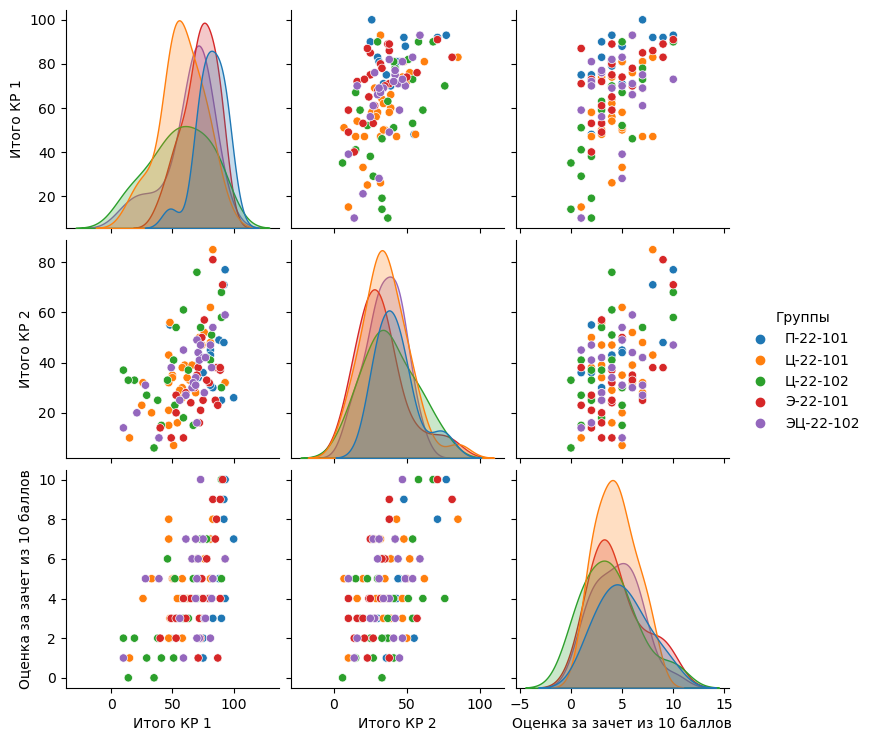

In [10]:
plt.figure(figsize=(12,8), dpi= 100)
sns.pairplot(dfccorr, kind="scatter", hue='Группы')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

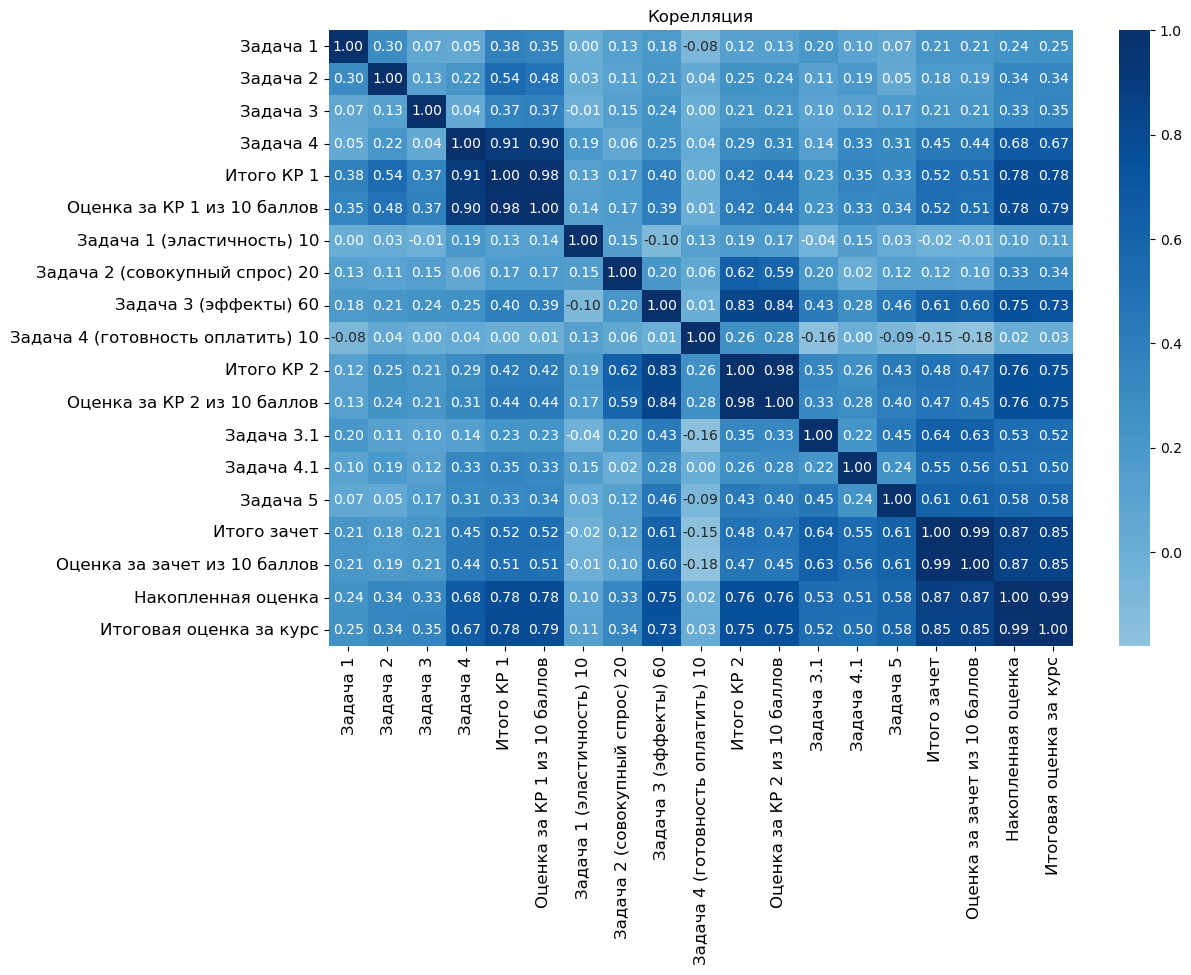

In [11]:
plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(dfc.corr(numeric_only=True), xticklabels=dfc.corr(numeric_only=True).columns, yticklabels=dfc.corr(numeric_only=True).columns, center=0, annot=True, cmap = 'Blues', fmt=".2f")
plt.title('Корелляция')
# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# plt.savefig('corrall.png', dpi=1000)

## Замечаем у группы П-22-101 ненормальное распределение оценок за конрольную работу, что не является нормой. Возможно, это из-за небольшого количества данных об этой группе.

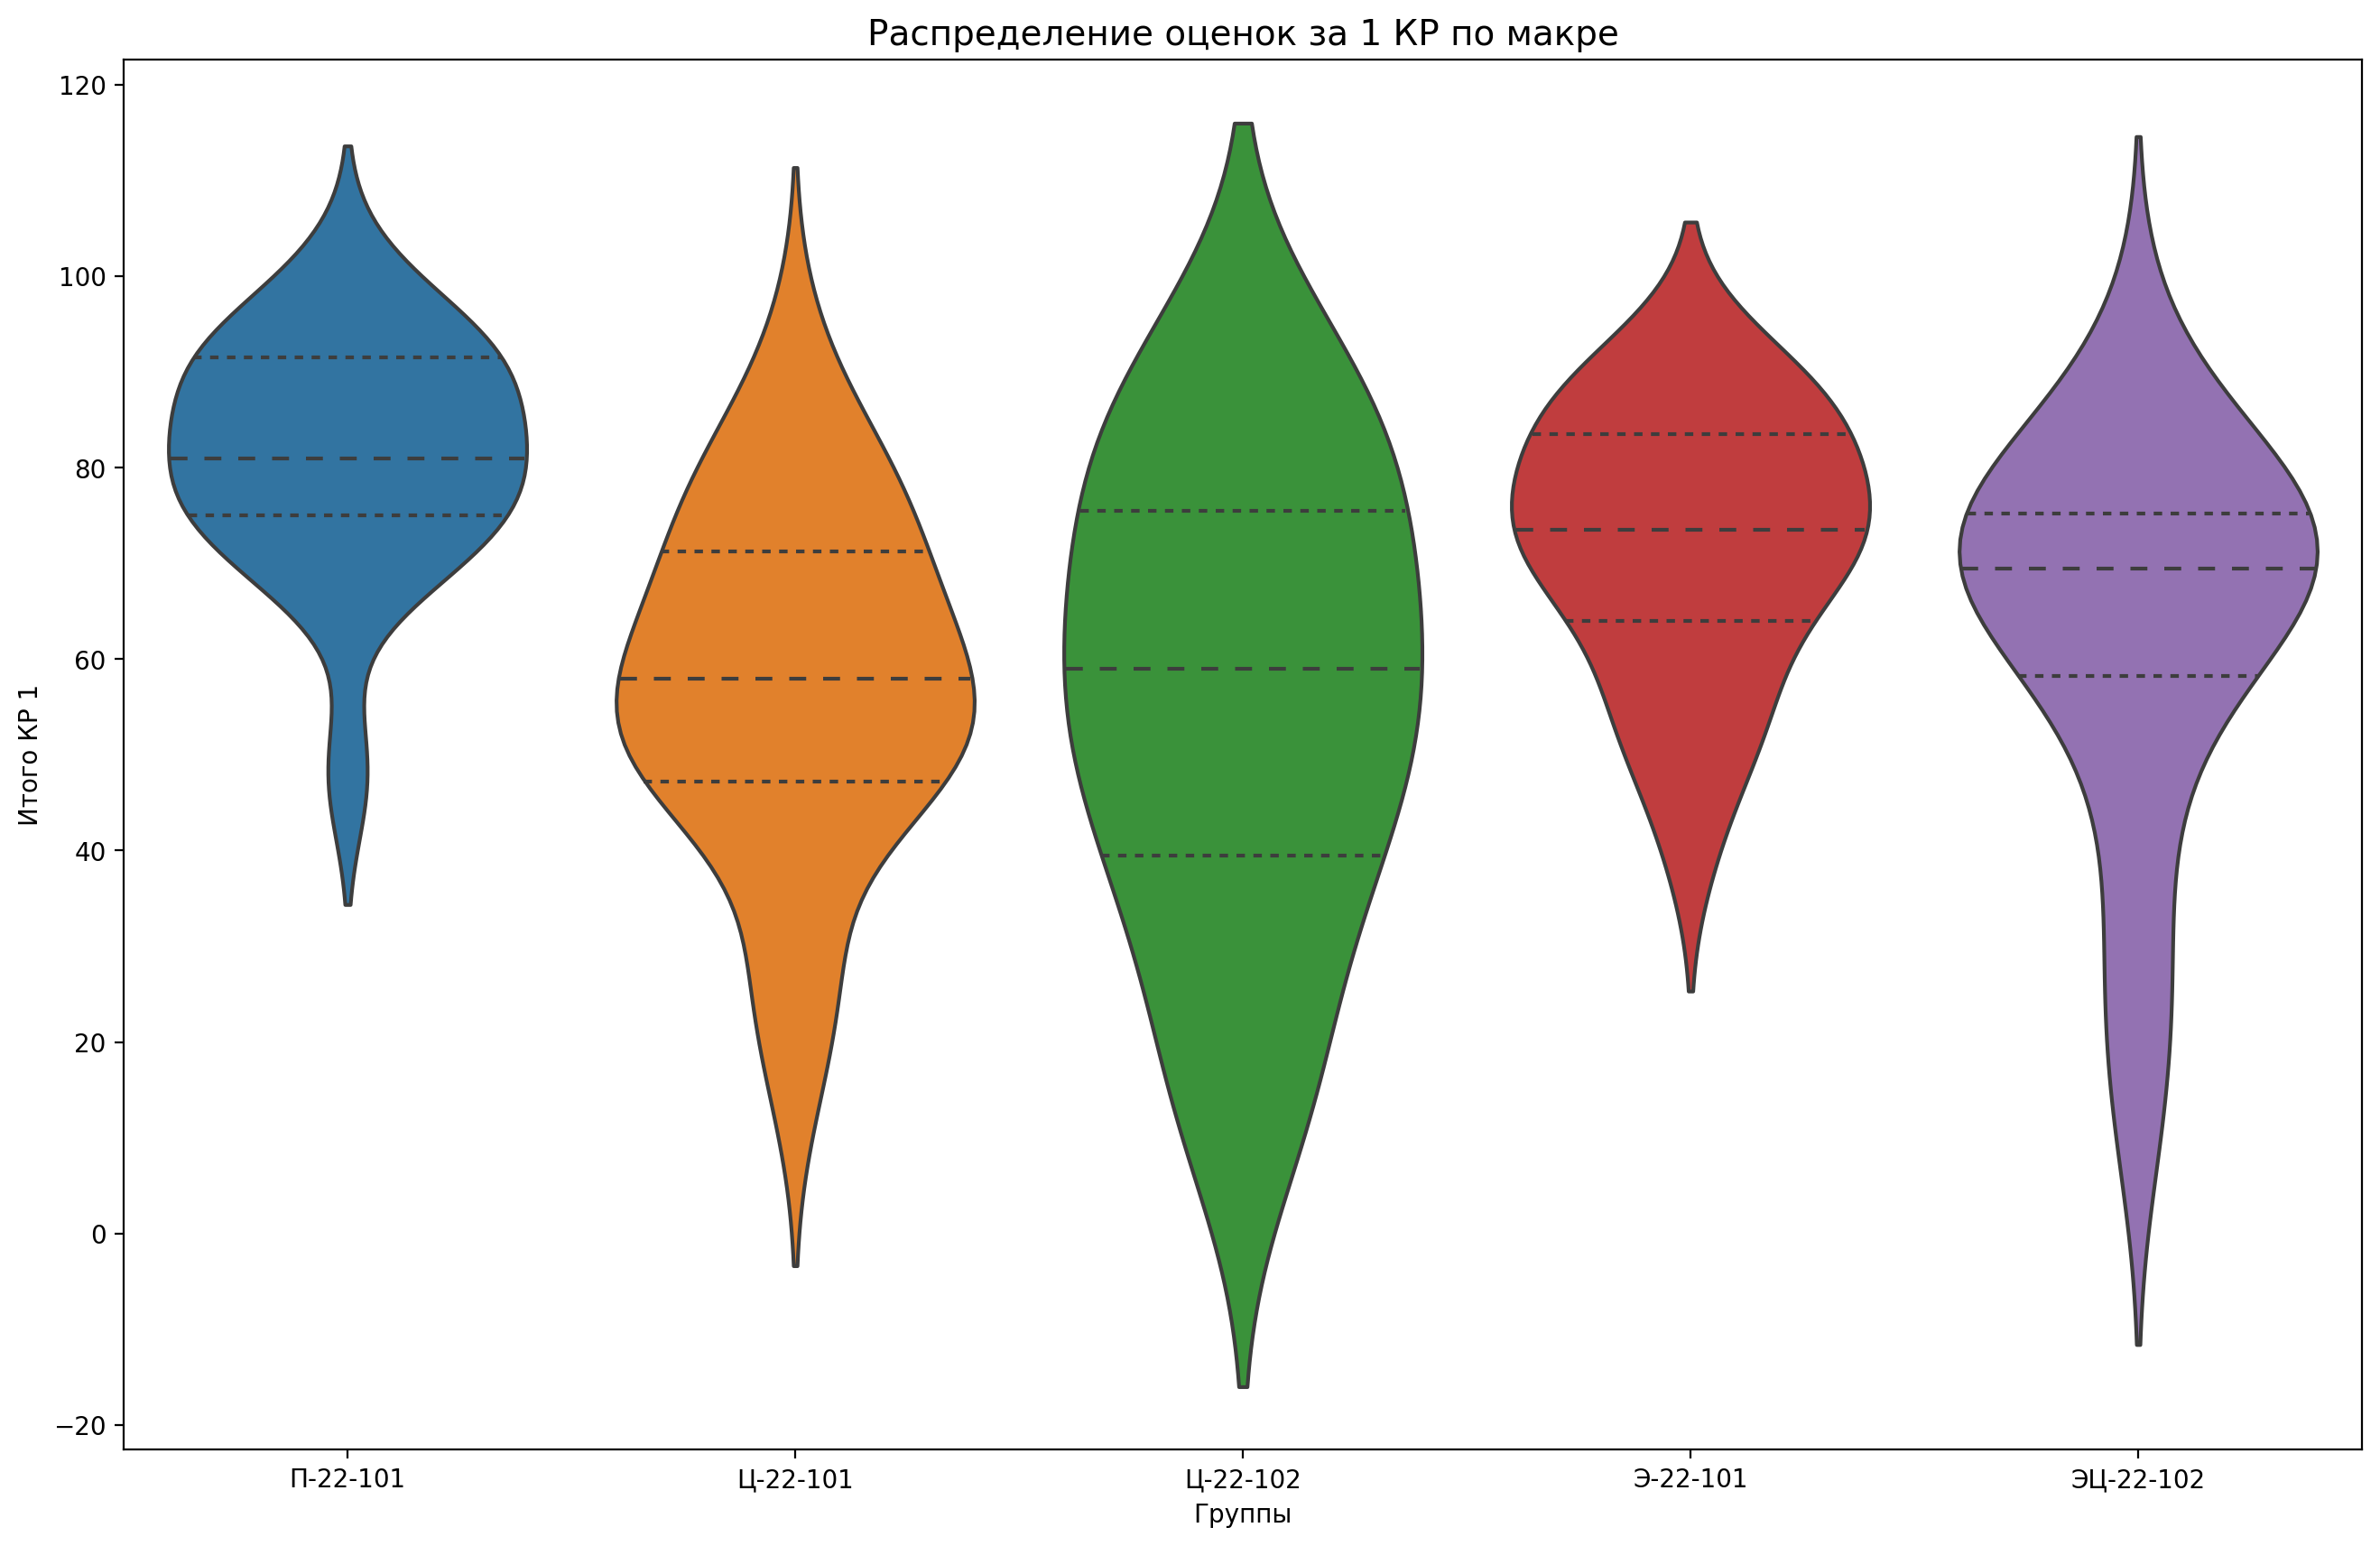

In [12]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 200)
sns.violinplot(x='Группы', y='Итого КР 1', data=dfc, scale='width', inner='quartile')

# Decoration
plt.title('Распределение оценок за 1 КР по макре', fontsize=14)
plt.show()

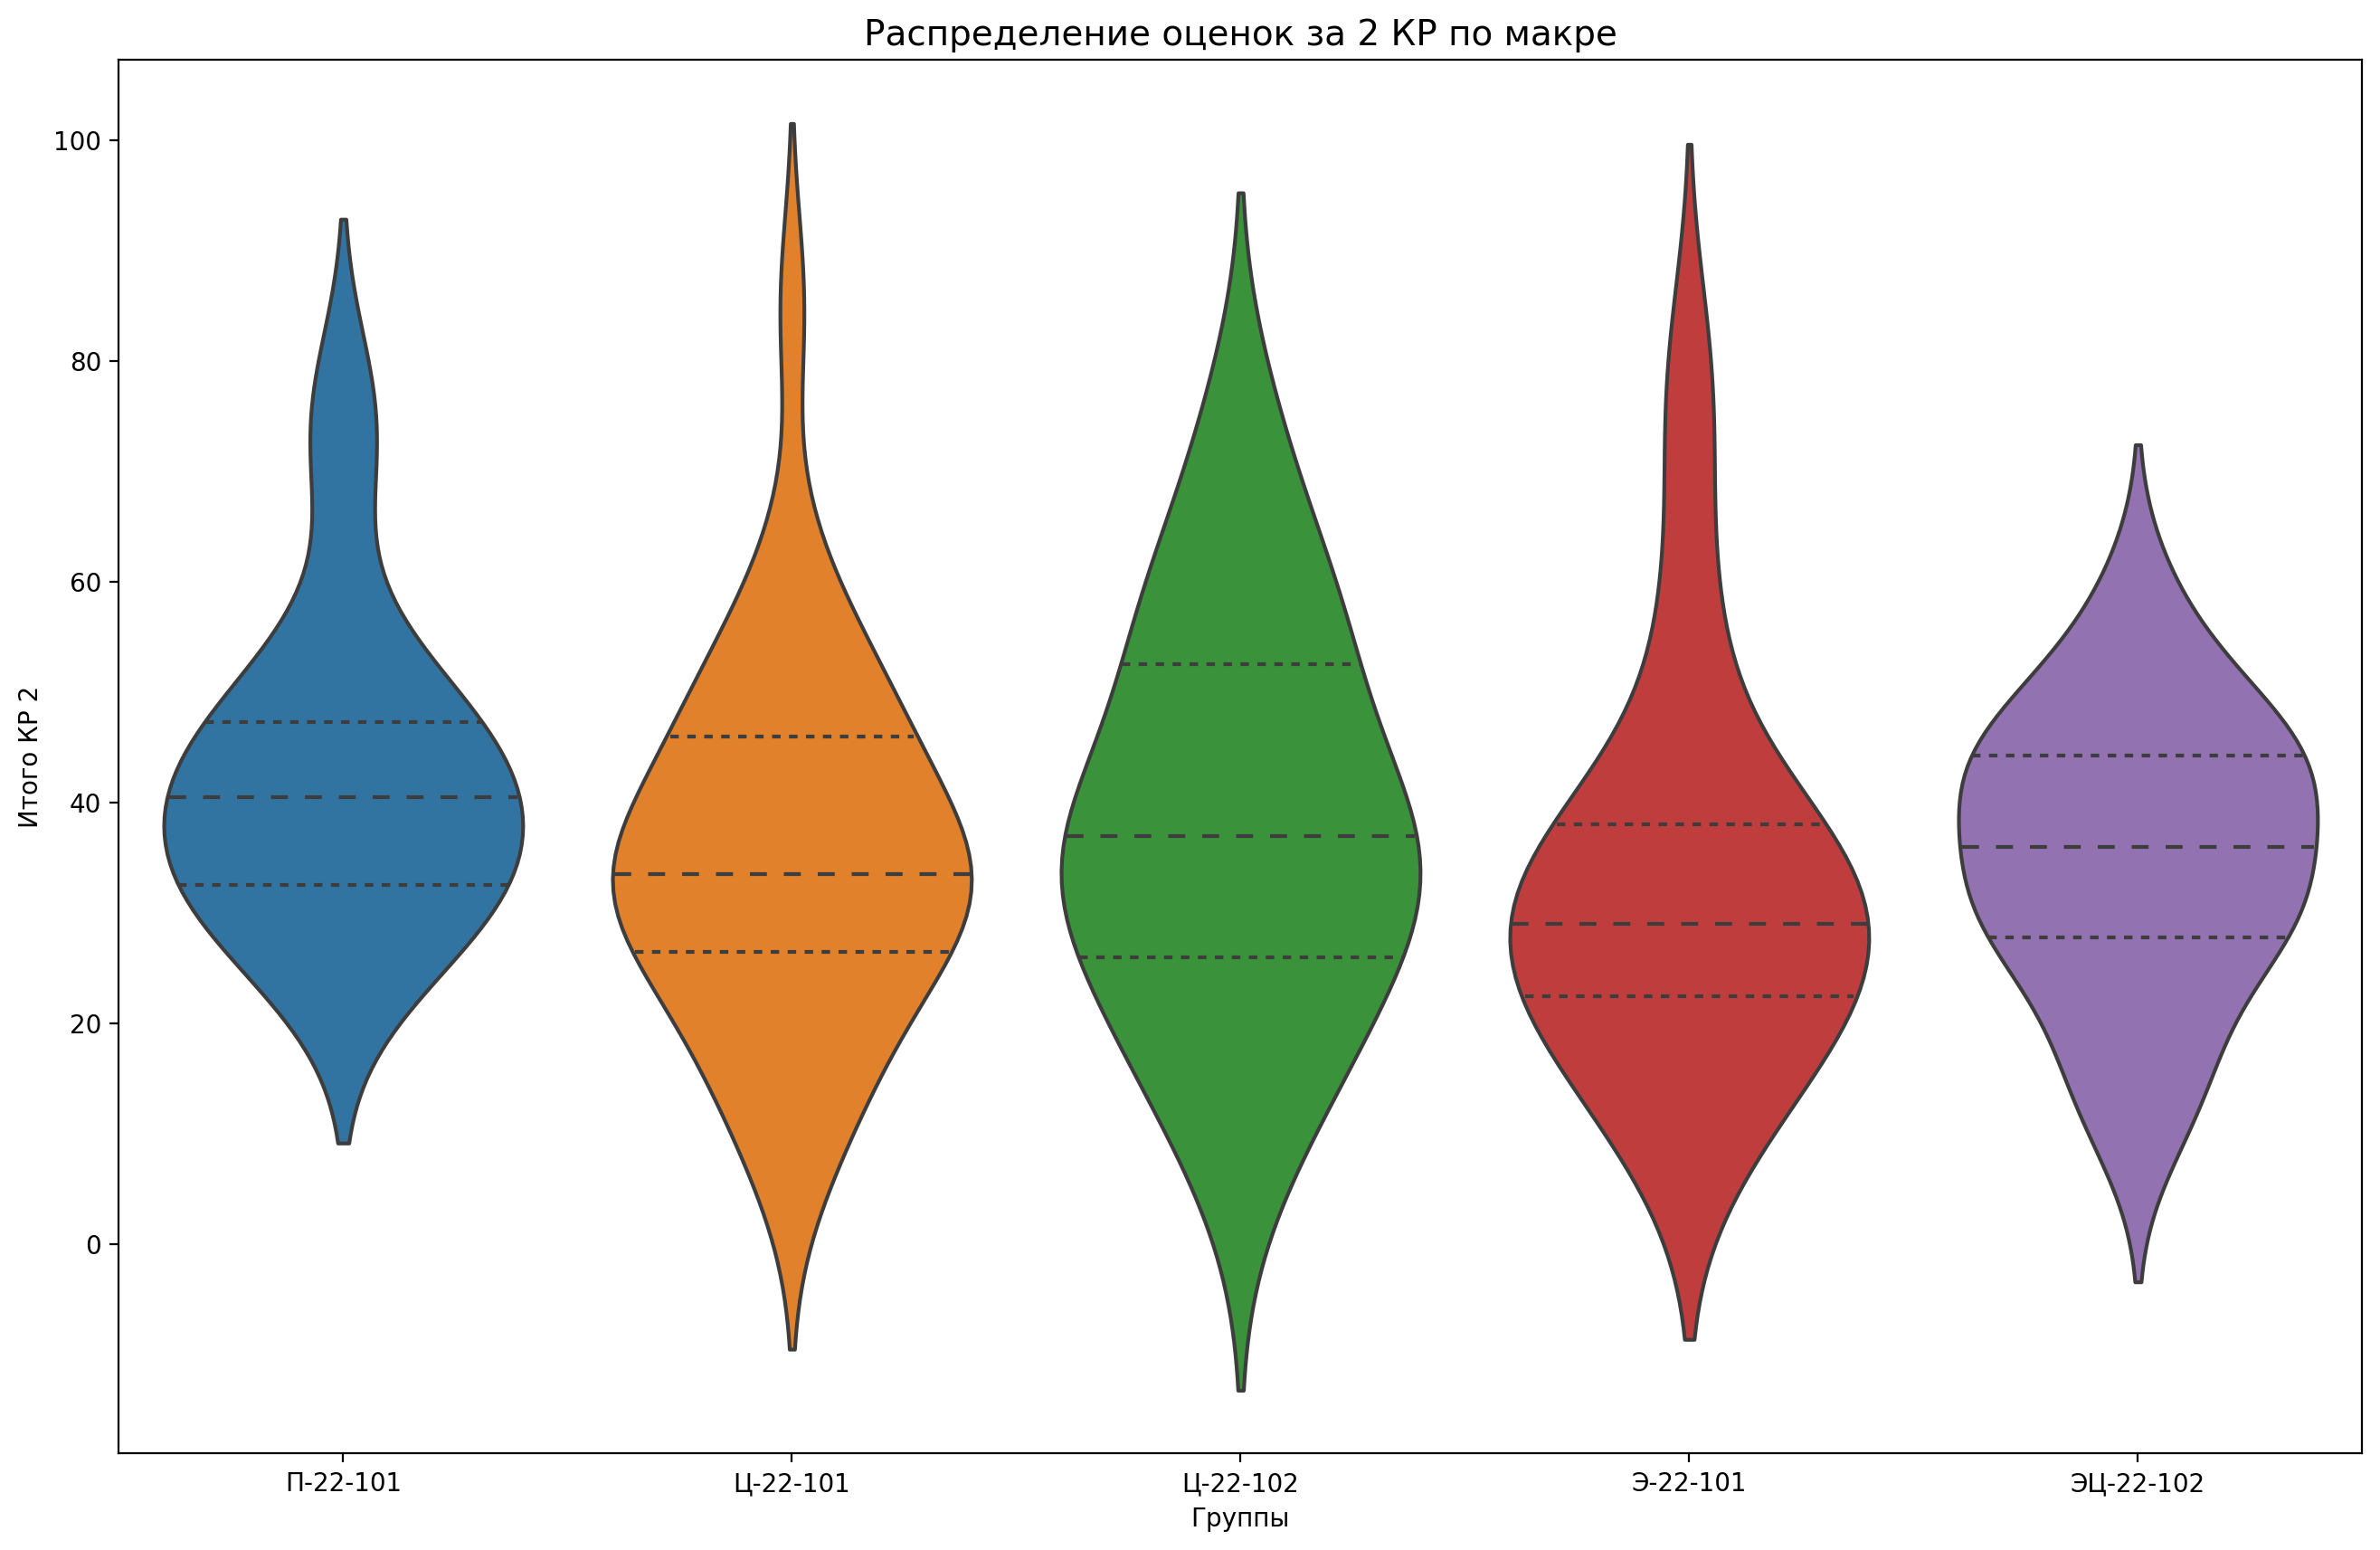

In [13]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 200)
sns.violinplot(x='Группы', y='Итого КР 2', data=dfc, scale='width', inner='quartile')

# Decoration
plt.title('Распределение оценок за 2 КР по макре', fontsize=14)
plt.show()

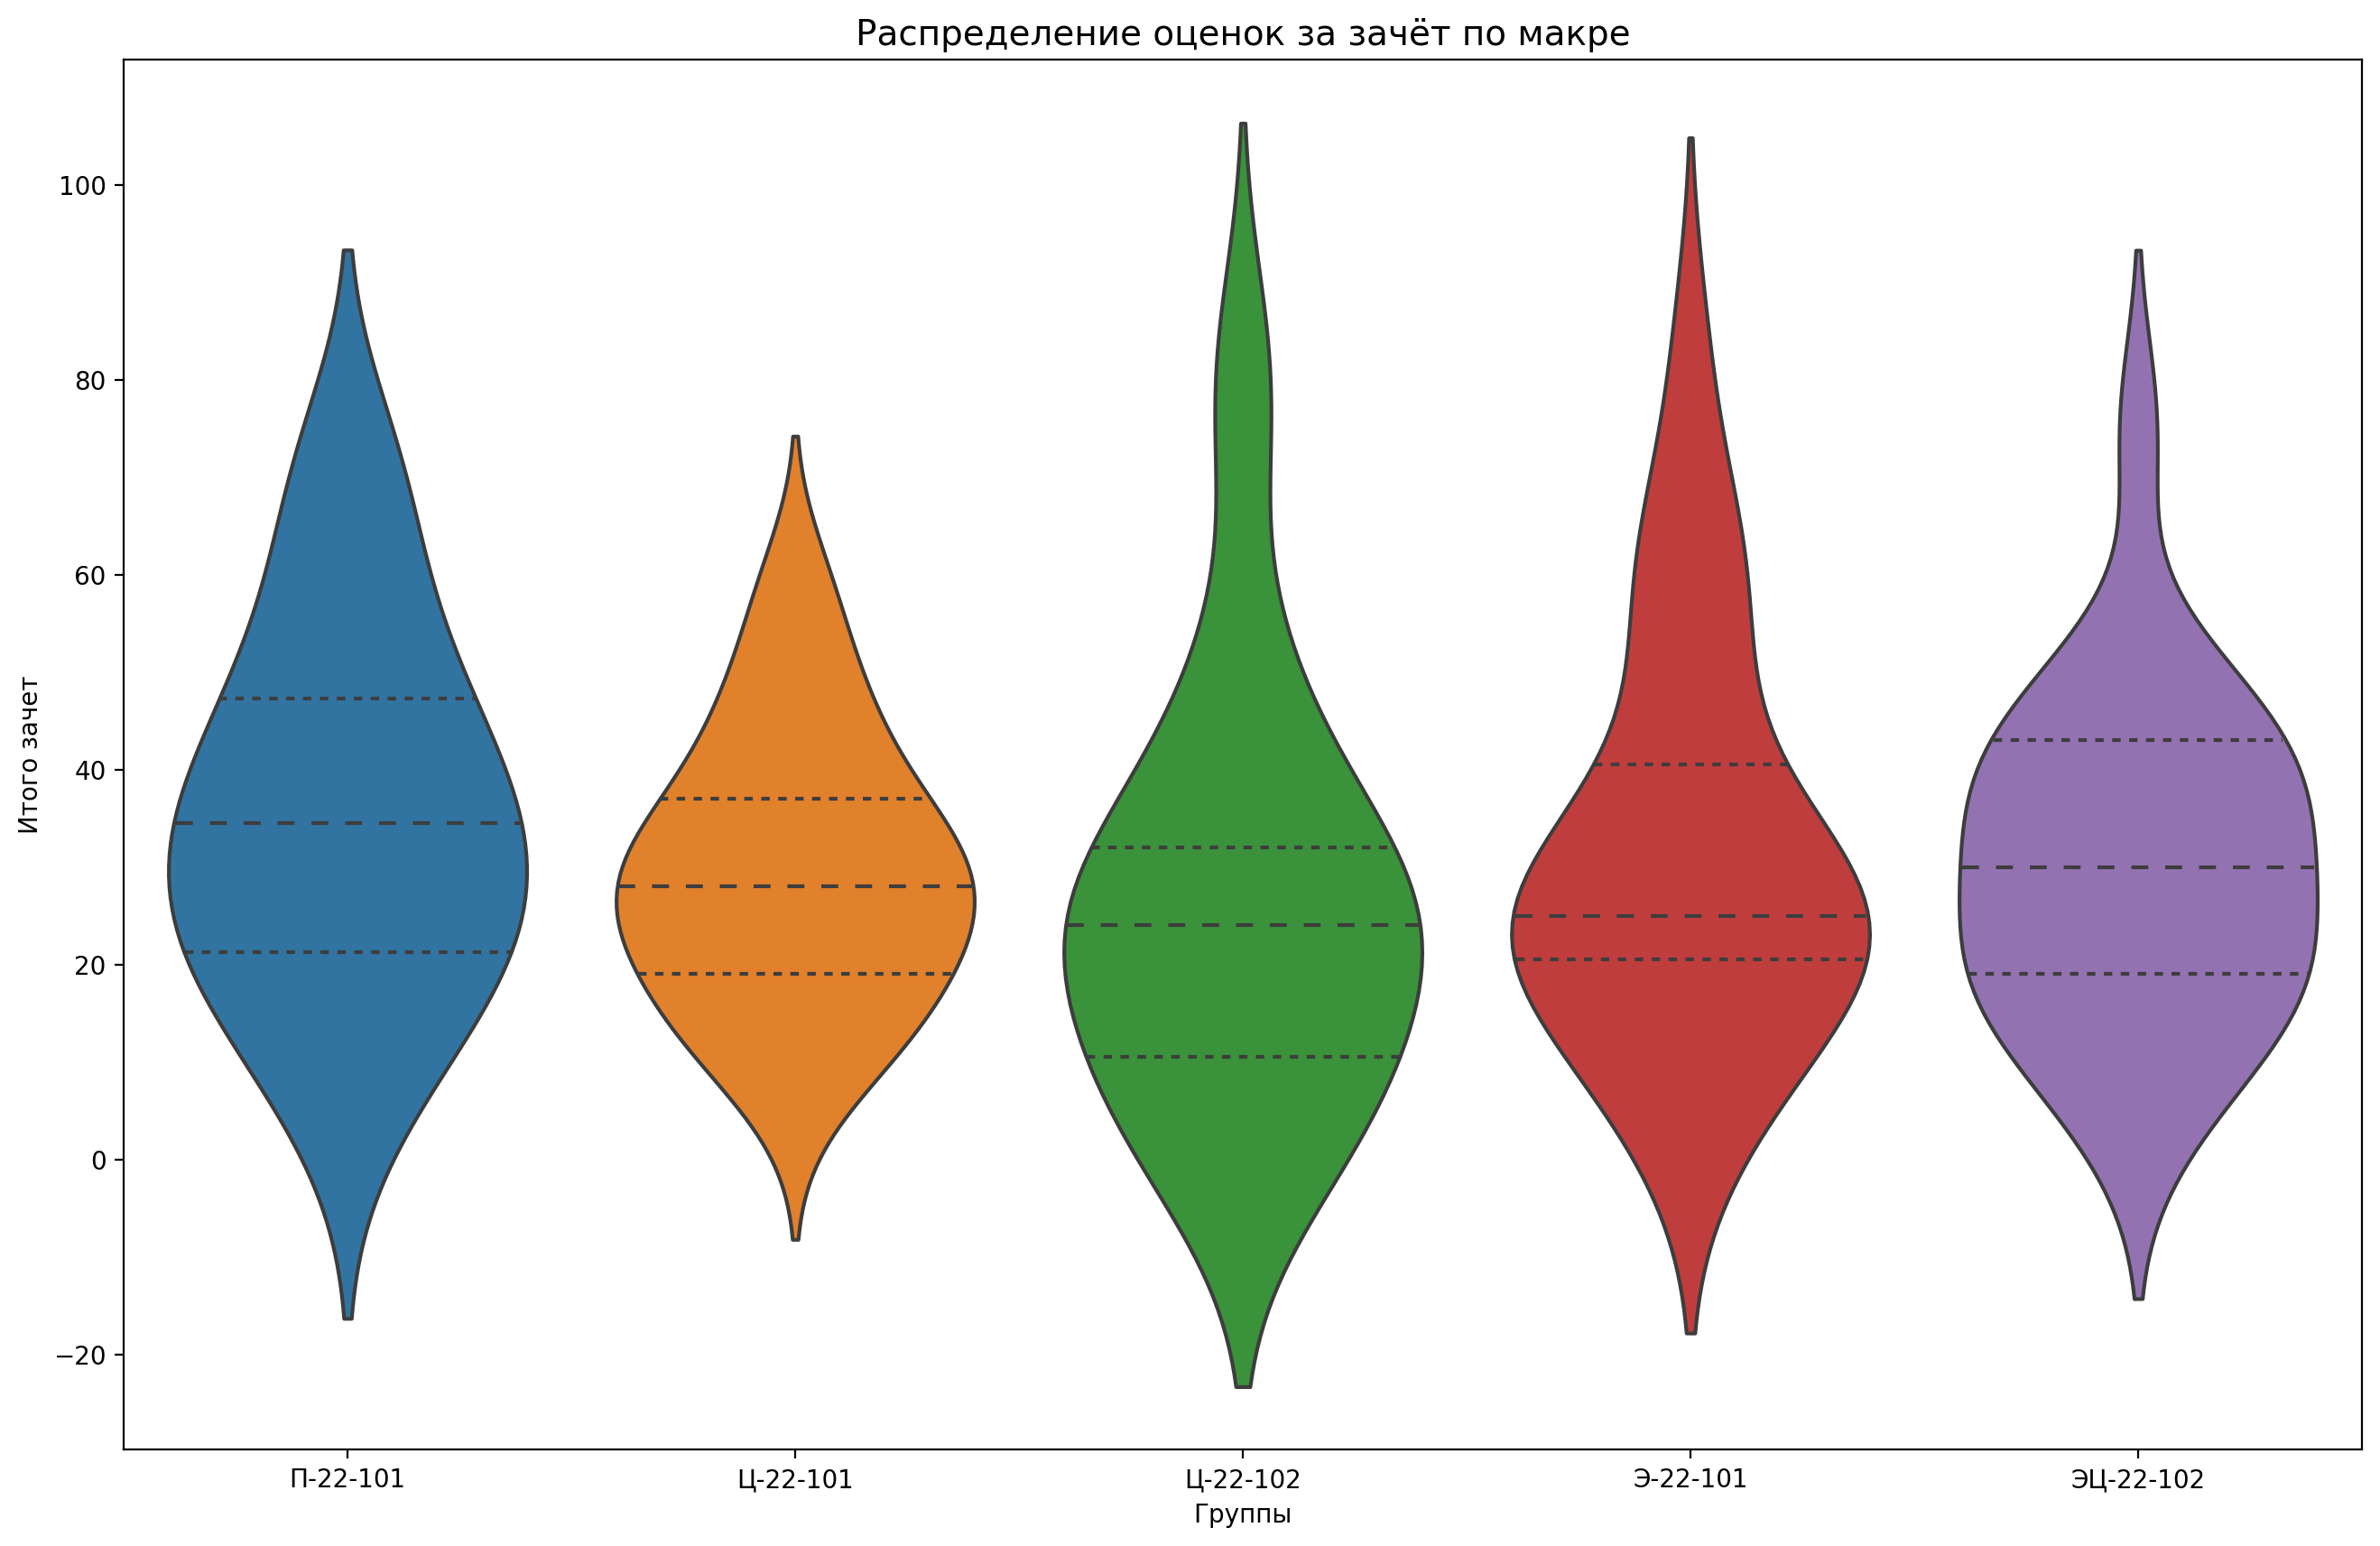

In [14]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 200)
sns.violinplot(x='Группы', y='Итого зачет', data=dfc, scale='width', inner='quartile')

# Decoration
plt.title('Распределение оценок за зачёт по макре', fontsize=14)
plt.show()

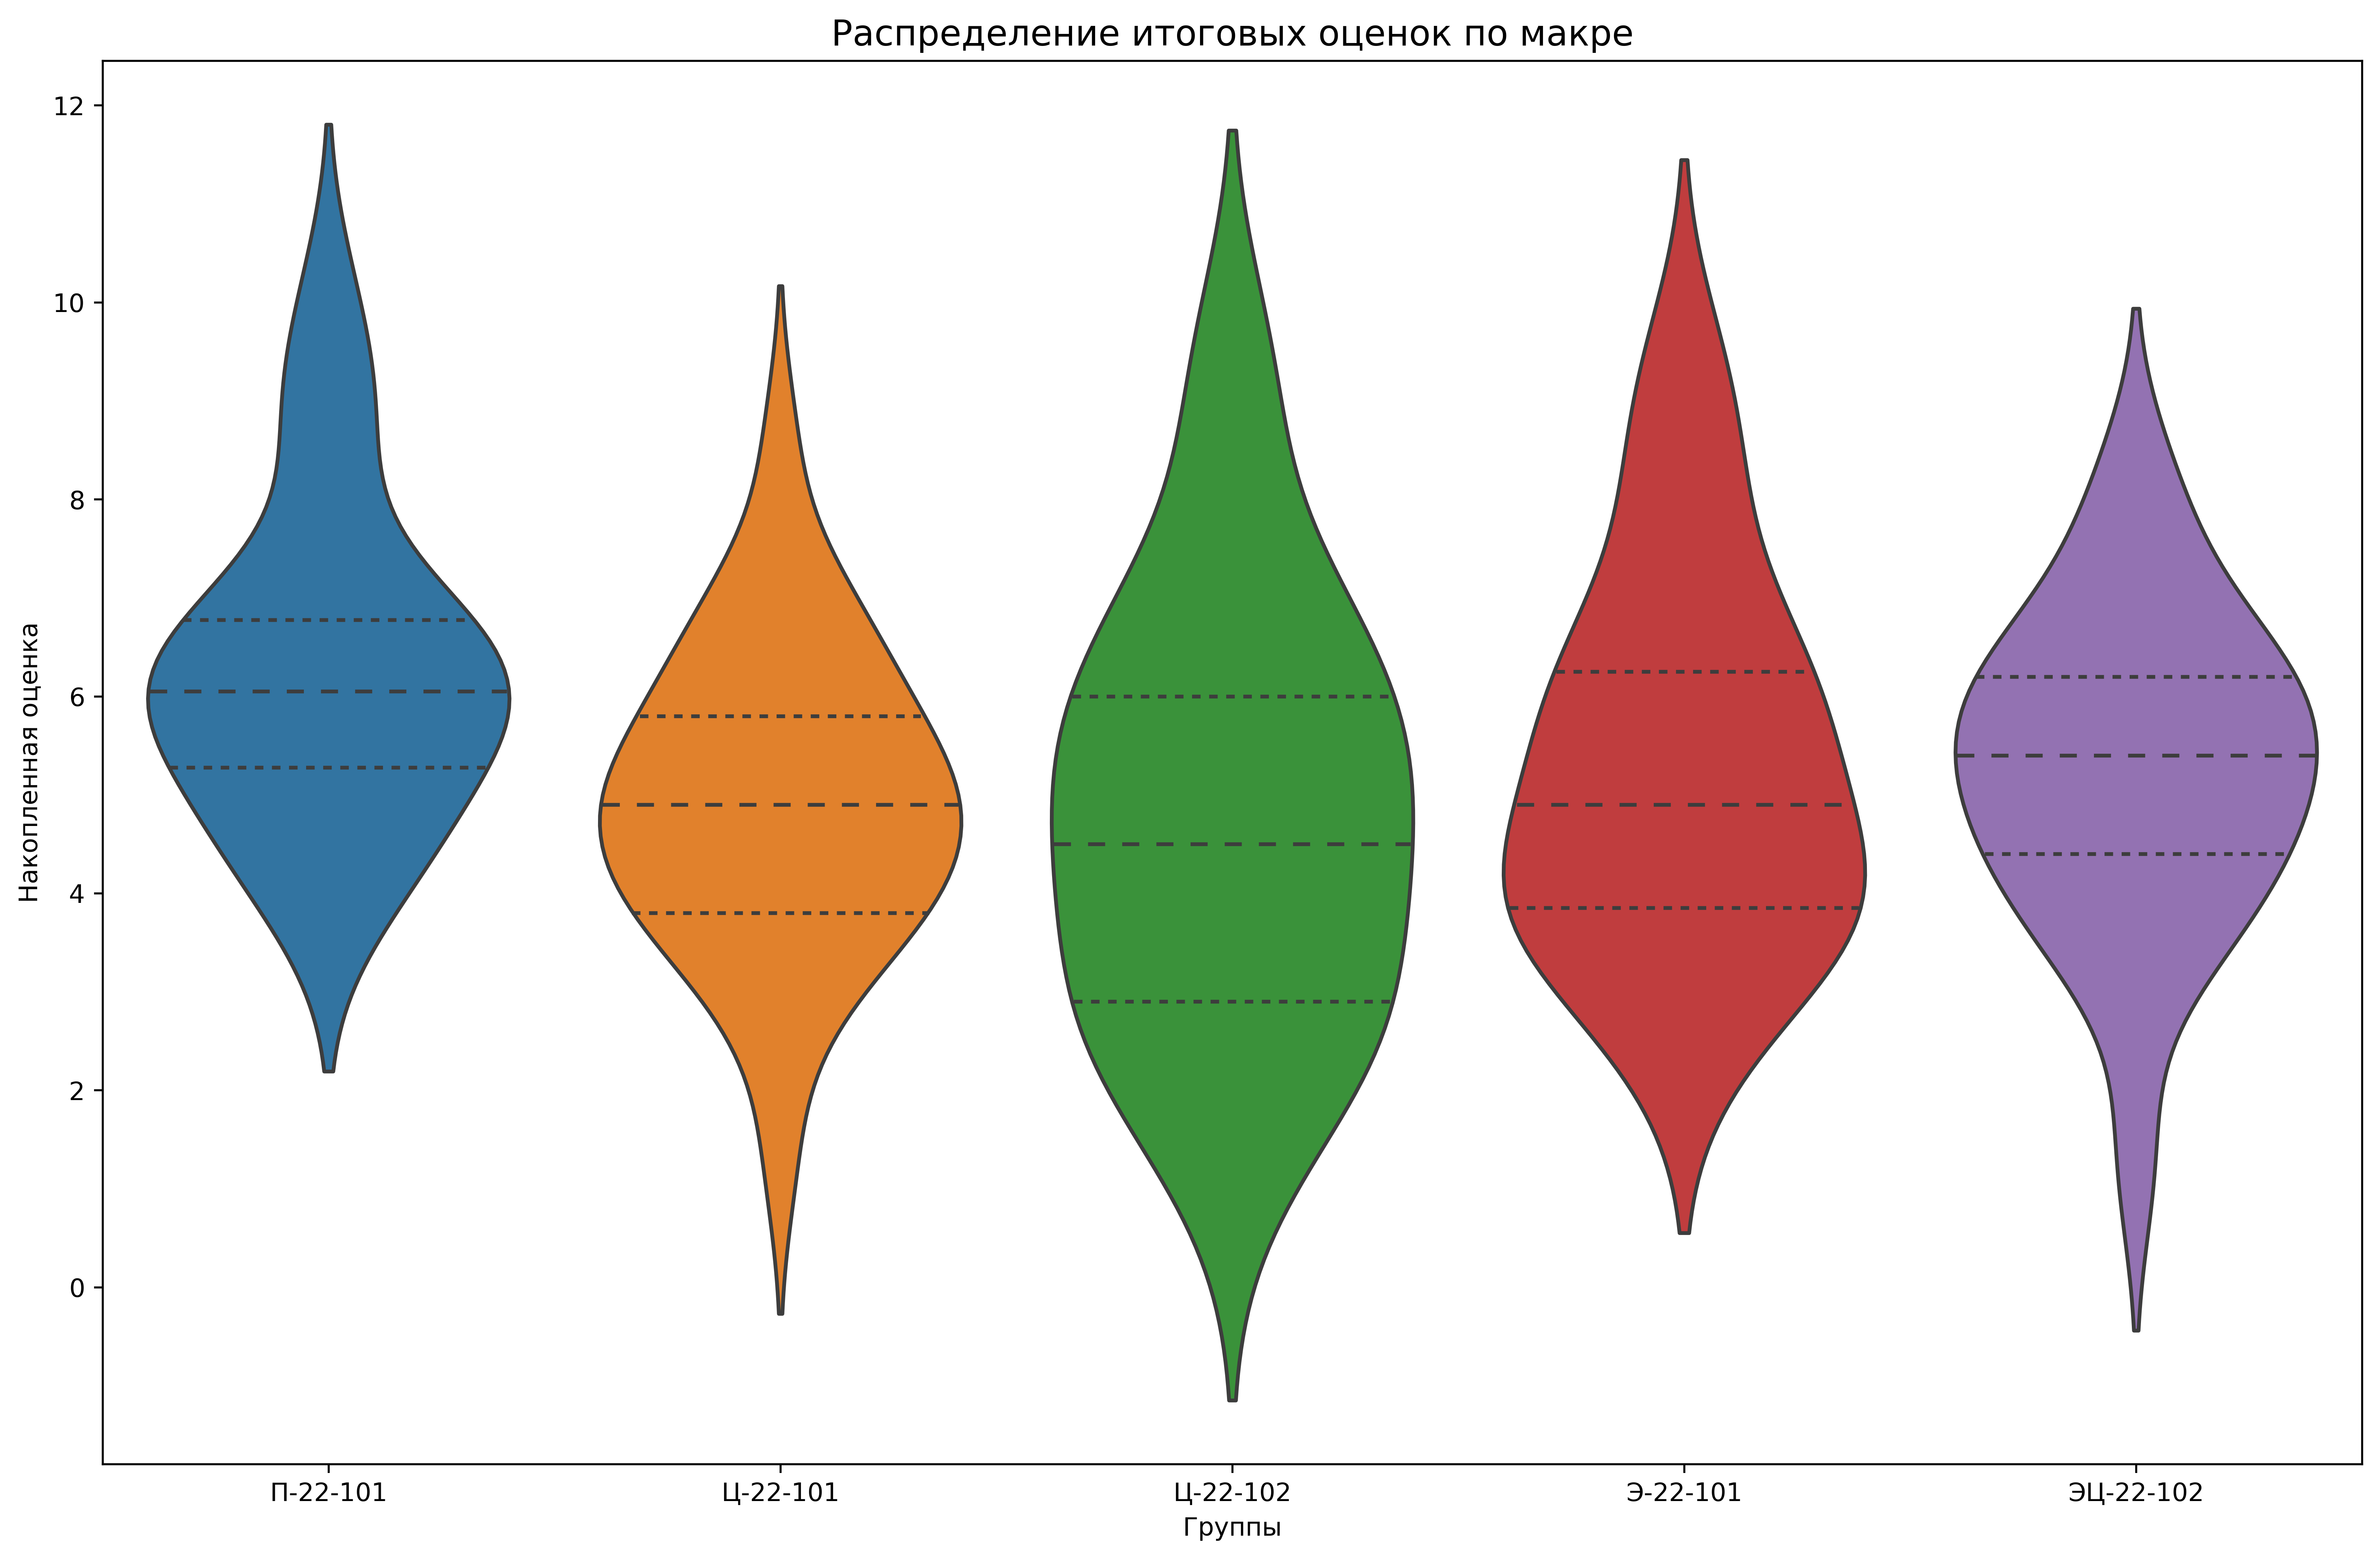

In [15]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 500)
sns.violinplot(x='Группы', y='Накопленная оценка', data=dfc, scale='width', inner='quartile')

# Decoration
plt.title('Распределение итоговых оценок по макре', fontsize=14)
plt.show()

## Такие же графики, но только другого формата

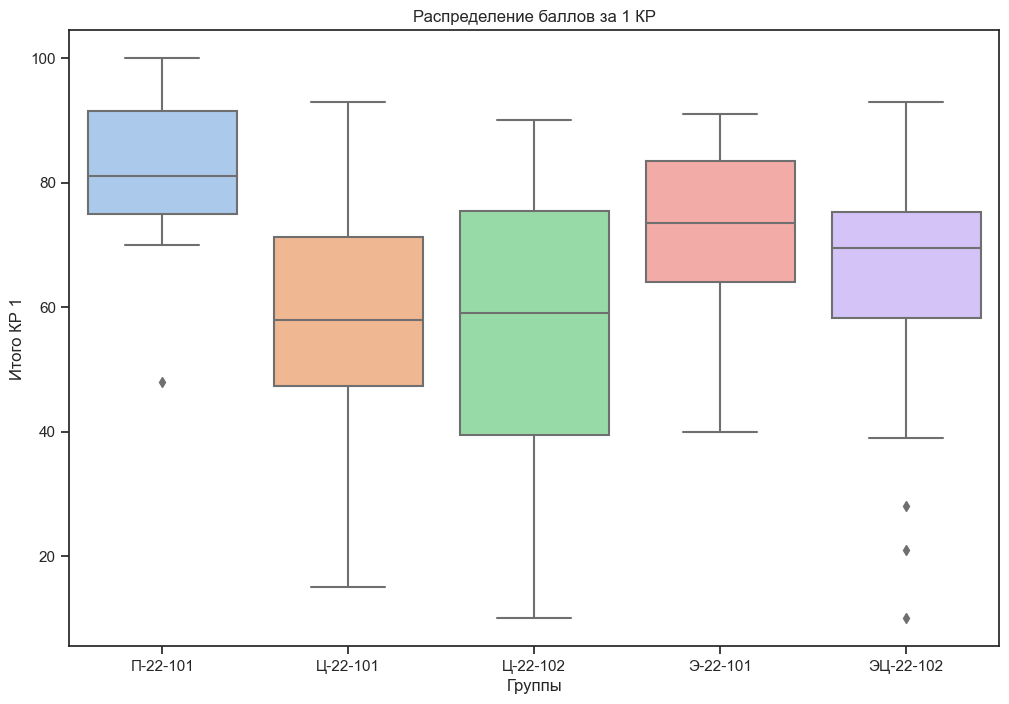

In [16]:
import seaborn as sns
# Draw Plot
plt.figure(figsize=(12,8), dpi= 100)
sns.set_theme(style="ticks", palette="pastel")
plt.title('Распределение баллов за 1 КР')

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Группы', y='Итого КР 1', data=dfc)
plt.savefig('boxplot1.png', dpi=100)

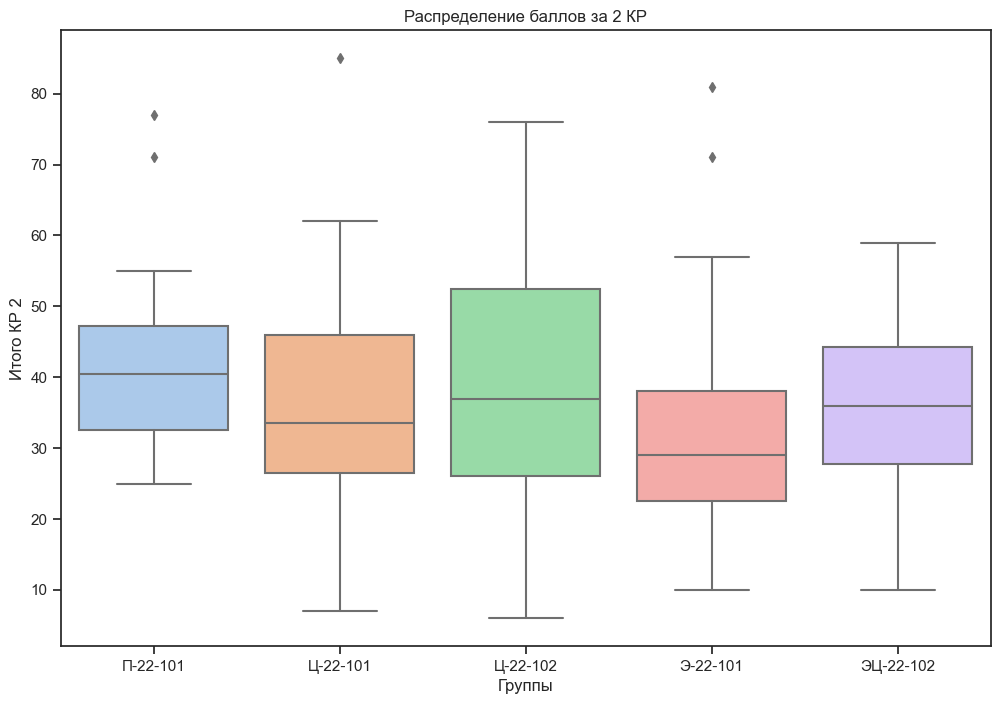

In [17]:
import seaborn as sns
# Draw Plot
plt.figure(figsize=(12,8), dpi= 100)
sns.set_theme(style="ticks", palette="pastel")
plt.title('Распределение баллов за 2 КР')

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Группы', y='Итого КР 2', data=dfc)
plt.savefig('boxplot2.png', dpi=100)

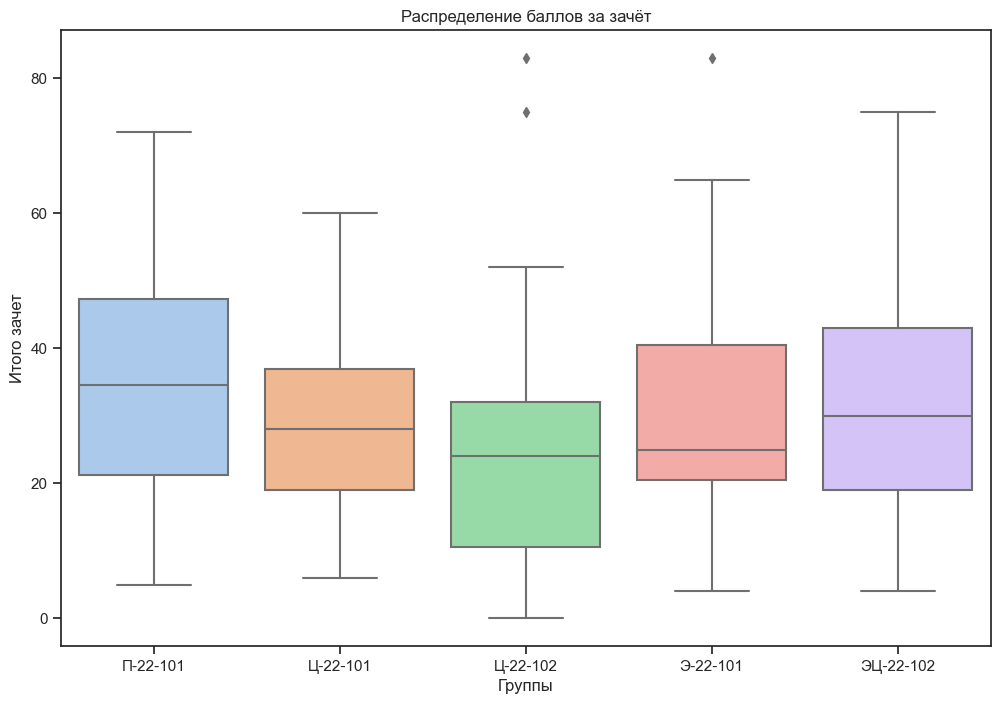

In [18]:
import seaborn as sns
# Draw Plot
plt.figure(figsize=(12,8), dpi= 100)
sns.set_theme(style="ticks", palette="pastel")
plt.title('Распределение баллов за зачёт')

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Группы', y='Итого зачет', data=dfc)
plt.savefig('boxplotZACHET.png', dpi=100)

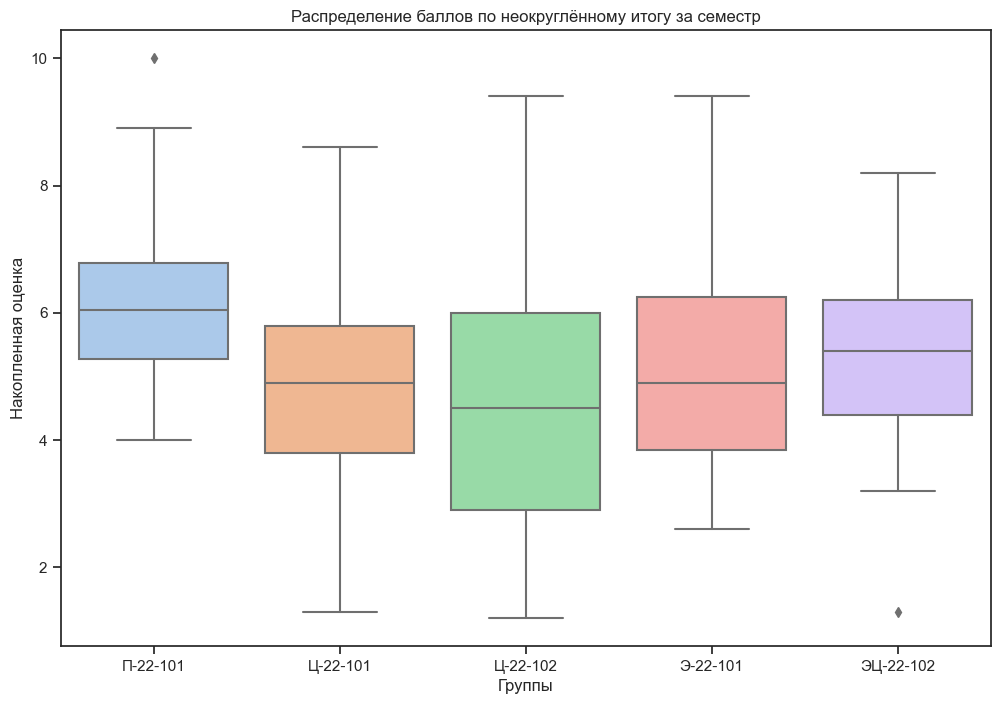

In [19]:
import seaborn as sns
# Draw Plot
plt.figure(figsize=(12,8), dpi= 100)
sns.set_theme(style="ticks", palette="pastel")
plt.title('Распределение баллов по неокруглённому итогу за семестр')

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Группы', y='Накопленная оценка', data=dfc)
plt.savefig('boxplotITOG1.png', dpi=100)

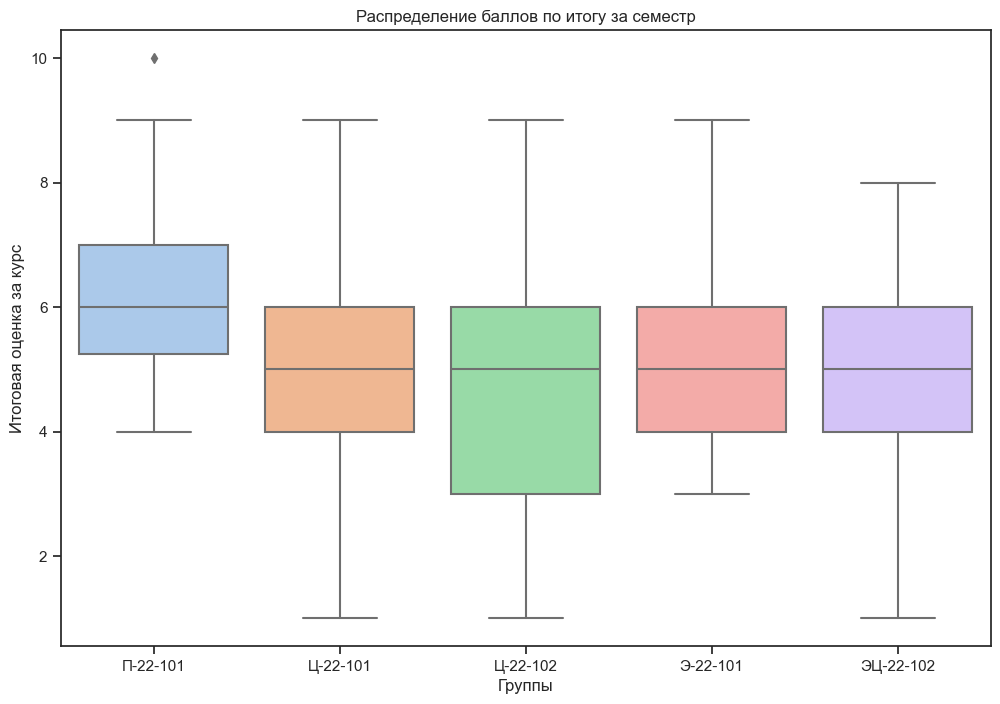

In [20]:
import seaborn as sns
# Draw Plot
plt.figure(figsize=(12,8), dpi= 100)
sns.set_theme(style="ticks", palette="pastel")
plt.title('Распределение баллов по итогу за семестр')

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Группы', y='Итоговая оценка за курс', data=dfc)
plt.savefig('boxplotITOG2.png', dpi=100)

## Посмотрим на отдельные случаи(оценки каждого) с разбивкой по разным группам

<Axes: xlabel='Итого КР 1', ylabel='Группы'>

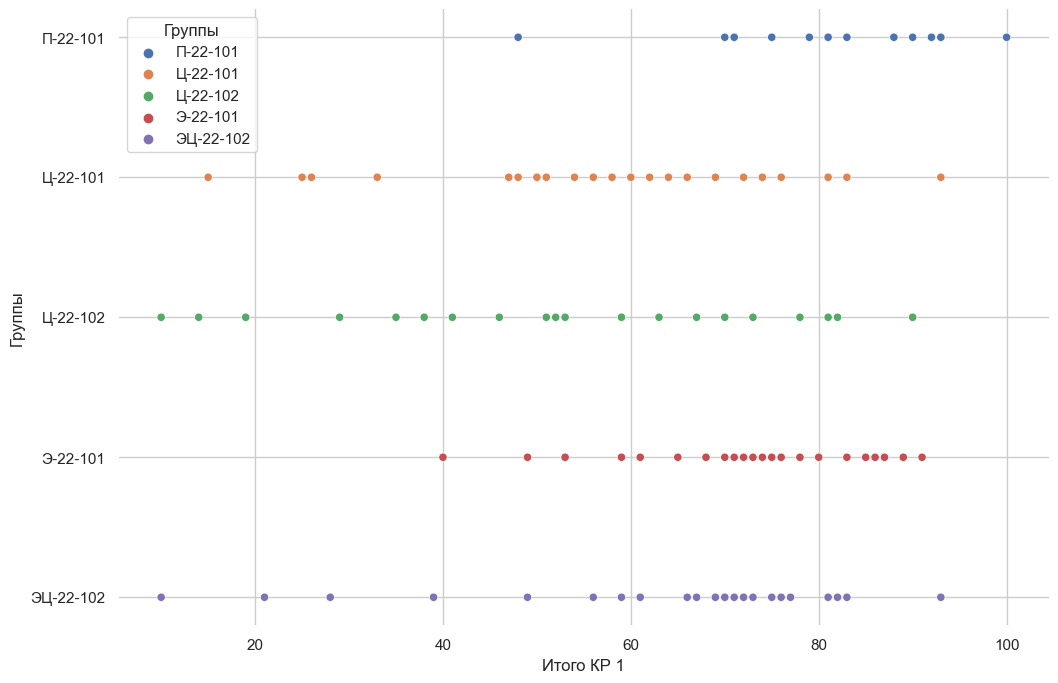

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(12, 8), dpi= 100)
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='Итого КР 1', y='Группы', data=dfc,
                hue="Группы")

<Axes: xlabel='Итого КР 2', ylabel='Группы'>

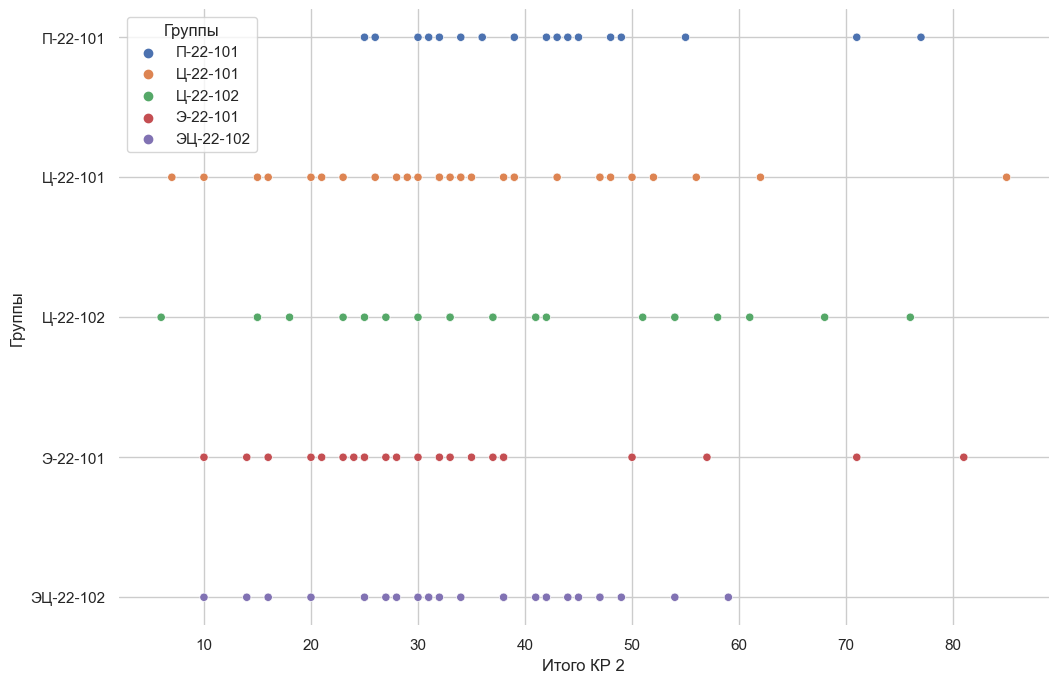

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(12, 8), dpi= 100)
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='Итого КР 2', y='Группы', data=dfc,
                hue="Группы")

## Добавил столбец с суммой баллов за две КР

In [23]:
dfc['Сумма баллов за две кр'] = dfc[['Итого КР 1','Итого КР 2']].sum(axis=1)
dfc['Фамилия и имя'] = dfc['Фамилия']+' '+dfc['Имя']
# dfc.rename(columns={'Имя': 'Фамилия и имя'}, inplace=True)
# dfc.drop(columns='Фамилия', inplace=True)
dfc

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,Фамилия и имя
0,Азаренкова,Наталья,П-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,16,0.0,0.0,1.0,25.0,4.0,6.1,6.0,125,Азаренкова Наталья
1,Борщёва,Елизавета,П-22-101,10.0,15.0,13.0,43.0,81,8,10.0,...,17,0.0,10.0,1.0,36.0,5.0,6.2,6.0,126,Борщёва Елизавета
2,Вронский,Александр,П-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,25,14.0,14.0,14.0,72.0,10.0,10.0,10.0,170,Вронский Александр
3,Голубцова,Дарья,П-22-101,10.0,15.0,15.0,43.0,83,8,10.0,...,-,0.0,14.0,5.0,20.0,3.0,4.8,5.0,113,Голубцова Дарья
4,Гранков,Георгий,П-22-101,10.0,15.0,20.0,45.0,90,9,10.0,...,3,2.0,12.0,2.0,20.0,3.0,5.1,5.0,115,Гранков Георгий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Татулова,Вероника,ЭЦ-22-102,10.0,15.0,11.0,41.0,77,8,NaN,...,4,0.0,4.0,2.0,21.0,3.0,5.4,5.0,119,Татулова Вероника
130,Тулякова,Софья,ЭЦ-22-102,10.0,15.0,11.0,34.0,70,7,8.0,...,10,0.0,4.0,0.0,14.0,2.0,3.5,4.0,86,Тулякова Софья
131,Чеснокова,Алина,ЭЦ-22-102,10.0,0.0,11.0,48.0,69,6,10.0,...,24,6.0,14.0,6.0,51.0,7.0,6.1,6.0,100,Чеснокова Алина
132,Шулик,Анжелика,ЭЦ-22-102,10.0,15.0,10.0,21.0,56,5,NaN,...,4,6.0,2.0,0.0,19.0,3.0,3.9,4.0,81,Шулик Анжелика


## Создал табличку без физтехов

In [24]:
dfc_without_fiztech = dfc[dfc.Группы != 'П-22-101']

In [25]:
top10=dfc_without_fiztech.sort_values(by='Сумма баллов за две кр', ascending=False)[['Фамилия и имя', 'Сумма баллов за две кр',
                                                                                    'Группы']].head(10)

## Топ 10 по баллам за две КР без физтехов

In [26]:
top10

,Фамилия и имя,Сумма баллов за две кр,Группы
31,Иванов Пётр,168,Ц-22-101
96,Сабирова Аделя,164,Э-22-101
79,Валеева Динара,162,Э-22-101
70,Сонина Лариса,158,Ц-22-102
105,Багайникова Анастасия,152,ЭЦ-22-102
71,Сороколад Анна,148,Ц-22-102
60,Королева Виктория,146,Ц-22-102
46,Тетерина Анна,143,Ц-22-101
119,Панин Глеб,137,ЭЦ-22-102
92,Охина Алина,133,Э-22-101


## Топ 20 по баллам за две КР без физтехов

In [27]:
top20=dfc_without_fiztech.sort_values(by='Сумма баллов за две кр', ascending=False)[['Фамилия и имя', 'Сумма баллов за две кр',
                                                                                     'Группы']].dropna().head(20)

In [28]:
top20

,Фамилия и имя,Сумма баллов за две кр,Группы
31,Иванов Пётр,168,Ц-22-101
96,Сабирова Аделя,164,Э-22-101
79,Валеева Динара,162,Э-22-101
70,Сонина Лариса,158,Ц-22-102
105,Багайникова Анастасия,152,ЭЦ-22-102
71,Сороколад Анна,148,Ц-22-102
60,Королева Виктория,146,Ц-22-102
46,Тетерина Анна,143,Ц-22-101
119,Панин Глеб,137,ЭЦ-22-102
92,Охина Алина,133,Э-22-101


In [29]:
names = list(top10['Группы'].unique())

In [30]:
names20 = list(top20['Группы'].unique())

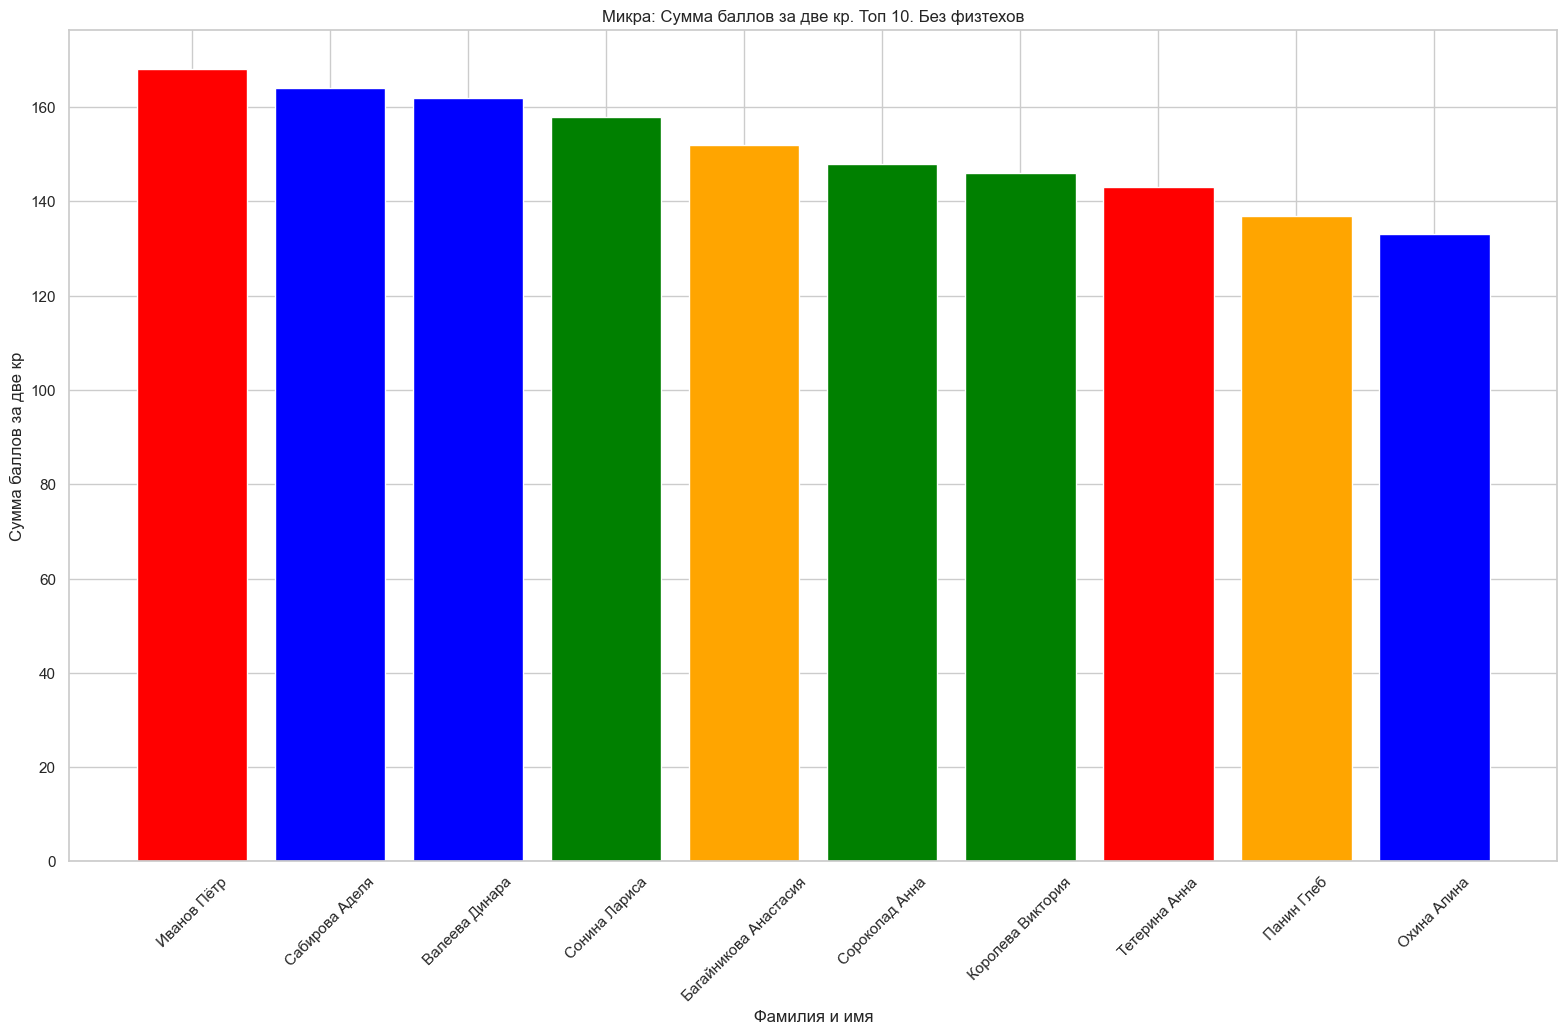

In [31]:

# Настройки графика
plt.figure(figsize=(19.2, 10.8))  # Размер графика 1920x1080

# Создание гистограммы
plt.bar(top10['Фамилия и имя'], top10['Сумма баллов за две кр'], color=top10['Группы'].map({'Ц-22-101': 'red', 'Э-22-101': 'blue', 'Ц-22-102': 'green', 'ЭЦ-22-102': 'orange'}))

# Настройки осей
plt.xticks(rotation=45)  # Поворот меток оси X на 45 градусов
plt.xlabel('Фамилия и имя')  # Название оси X
plt.ylabel('Сумма баллов за две кр')  # Название оси Y
plt.title('Микра: Сумма баллов за две кр. Топ 10. Без физтехов')
# Создание легенды
groups = list(top10['Группы'].unique())
legend_colors = ['red', 'blue', 'green', 'orange']

# Отображение графика

plt.savefig('histogramall10.png', dpi=100)  # Сохранение графика в файл
plt.show()


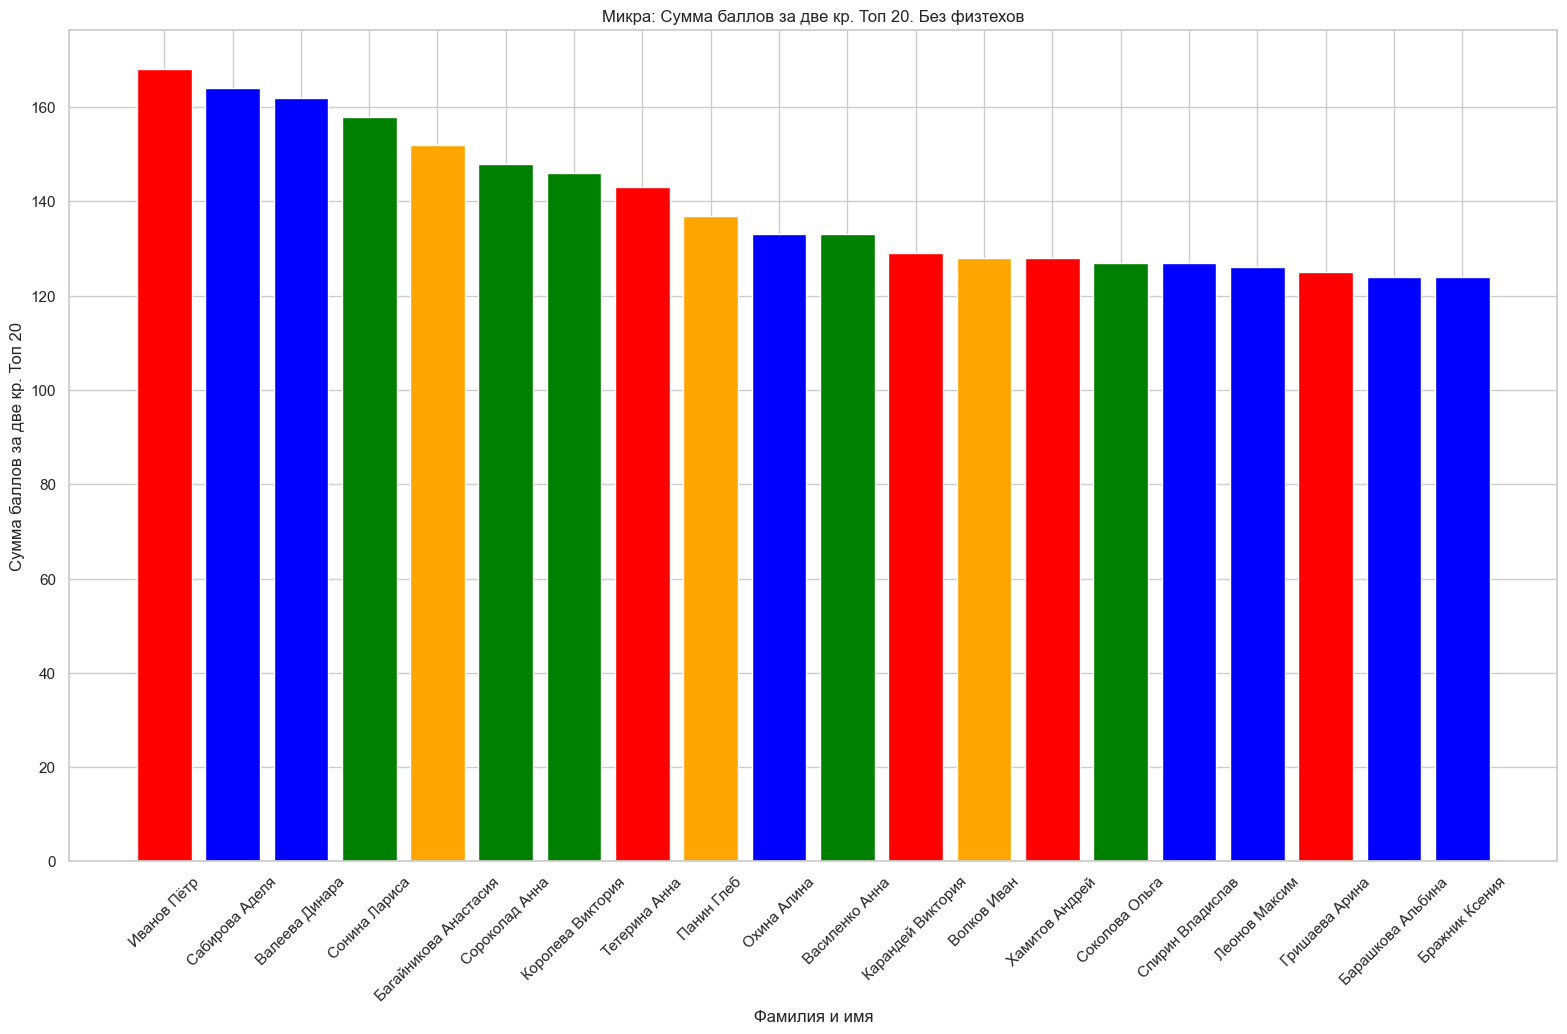

In [32]:

# Настройки графика
plt.figure(figsize=(19.2, 10.8))  # Размер графика 1920x1080

# Создание гистограммы
plt.bar(top20['Фамилия и имя'], top20['Сумма баллов за две кр'], color=top20['Группы'].map({'Ц-22-101': 'red', 'Э-22-101': 'blue', 'Ц-22-102': 'green', 'ЭЦ-22-102': 'orange'}))

# Настройки осей
plt.xticks(rotation=45)  # Поворот меток оси X на 45 градусов
plt.xlabel('Фамилия и имя')  # Название оси X
plt.ylabel('Сумма баллов за две кр. Топ 20')  # Название оси Y
plt.title('Микра: Сумма баллов за две кр. Топ 20. Без физтехов')
# Создание легенды
groups = list(top20['Группы'].unique())
legend_colors = ['red', 'blue', 'green', 'orange']

# Отображение графика

plt.savefig('histogramall20.png', dpi=100)  # Сохранение графика в файл
plt.show()


In [33]:
top10_with_fiztech=dfc.sort_values(by='Сумма баллов за две кр', ascending=False)[['Фамилия и имя', 'Сумма баллов за две кр', 'Группы']].head(10)

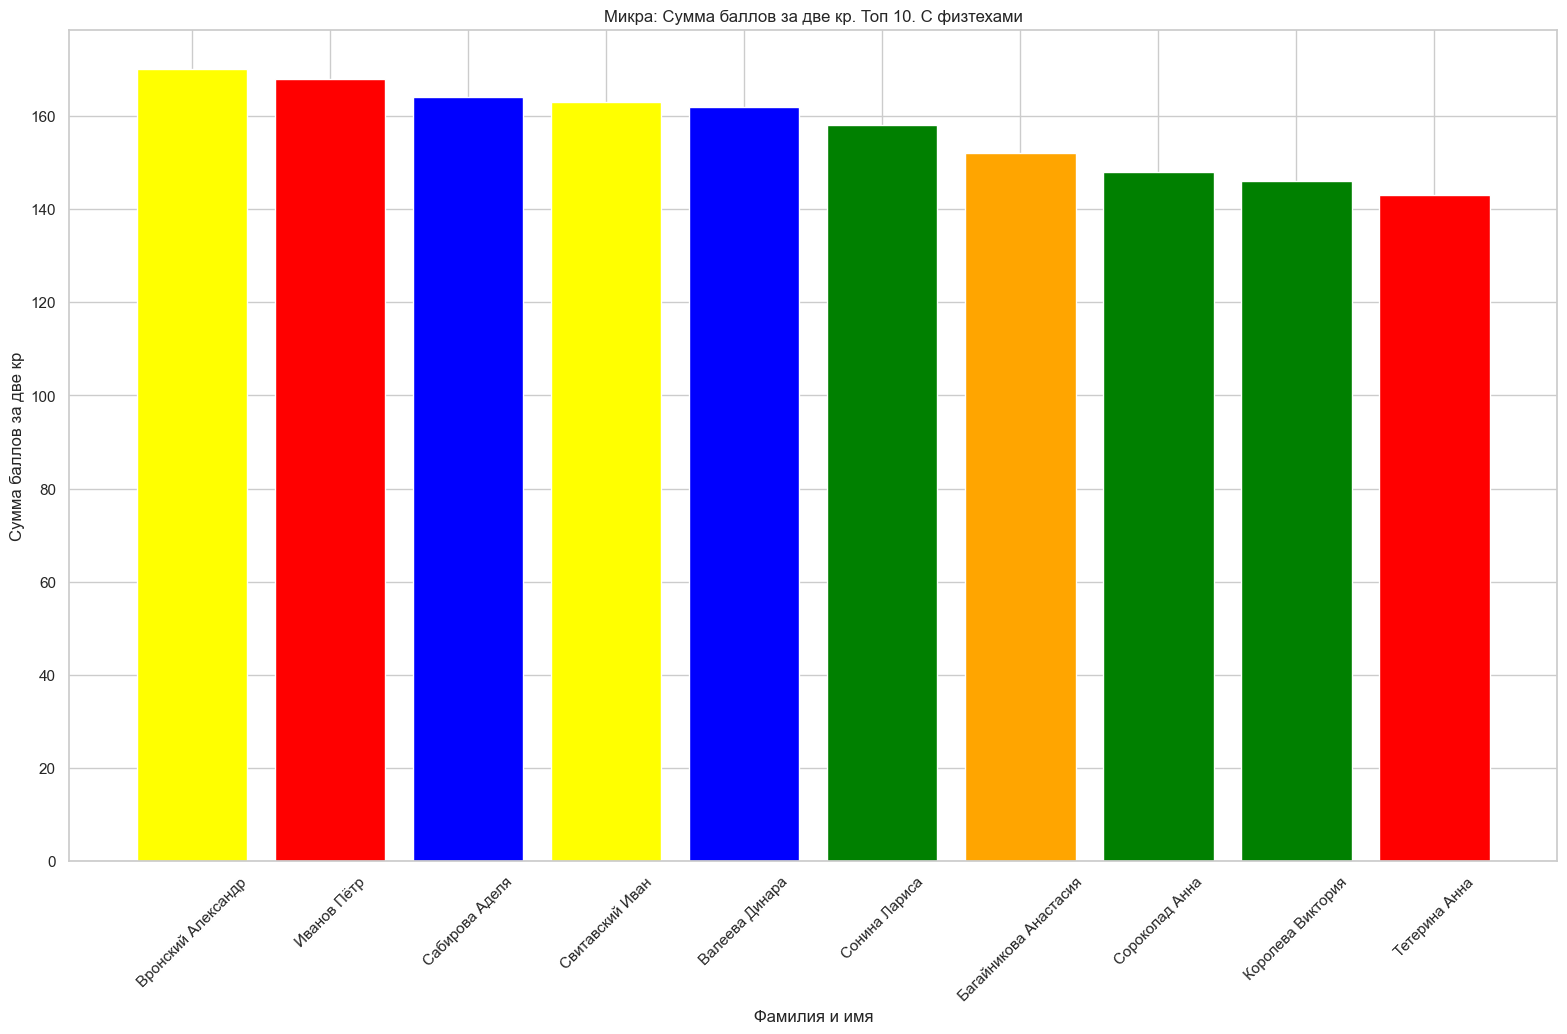

In [34]:
# Настройки графика
plt.figure(figsize=(19.2, 10.8))  # Размер графика 1920x1080

# Создание гистограммы
plt.bar(top10_with_fiztech['Фамилия и имя'], top10_with_fiztech['Сумма баллов за две кр'], color=top10_with_fiztech['Группы'].map({'П-22-101':'yellow','Ц-22-101': 'red', 'Э-22-101': 'blue', 'Ц-22-102': 'green', 'ЭЦ-22-102': 'orange'}))

# Настройки осей
plt.xticks(rotation=45)  # Поворот меток оси X на 45 градусов
plt.xlabel('Фамилия и имя')  # Название оси X
plt.ylabel('Сумма баллов за две кр')  # Название оси Y
plt.title('Микра: Сумма баллов за две кр. Топ 10. С физтехами')

# Создание легенды
groups = list(top10_with_fiztech['Группы'].unique())
legend_colors = ['yellow' ,'red', 'blue', 'green', 'orange']

# Отображение графика

plt.savefig('histogramall10_with_fiztech.png', dpi=100)  # Сохранение графика в файл
plt.show()

## Топ 10 по баллам за 2 КР включая физтехов

In [35]:
top10_with_fiztech=dfc.sort_values(by='Сумма баллов за две кр', ascending=False)[['Фамилия и имя', 'Сумма баллов за две кр', 'Группы']].head(100)

In [36]:
top10_with_fiztech.reset_index().drop(columns = ['index'])

,Фамилия и имя,Сумма баллов за две кр,Группы
0,Вронский Александр,170,П-22-101
1,Иванов Пётр,168,Ц-22-101
2,Сабирова Аделя,164,Э-22-101
3,Свитавский Иван,163,П-22-101
4,Валеева Динара,162,Э-22-101
...,...,...,...
95,Чельцов Александр,77,Ц-22-102
96,Торопкин Сергей,75,Ц-22-102
97,Чайкин Егор,73,Э-22-101
98,Смирнова Дарья,70,Ц-22-101


## Наиболее частовстречаемые баллы за вторую КР

In [37]:
dfc['Итого КР 2'].mode()

0    32
1    38
Name: Итого КР 2, dtype: int64

# Добавлю к признакам датафрейма группы людей в ВК, в которых они состоят. В пдф файле ошибка, так как не указал свой токен от ВК
Свой токен вк можно получить перейдя по этой ссылке: https://oauth.vk.com/authorize?client_id=6121396&redirect_uri=https://oauth.vk.com/blank.html&scope=messages,offline,friends&response_type=token

In [126]:
token = ''

In [39]:
import vk_api
from vk_api.longpoll import VkLongPoll, VkEventType

# Получите ВК токен здесь https://vkhost.github.io/ и вставьте его ниже (Берете из адресной строки):
vk_session = vk_api.VkApi(token=token)
s = vk_session.get_api()

# Вставьте ID беседы (Берете из адресной строки):
chat_id = 310

# Введите ID вашего аккаунта:
user_id = 319902415


histandmembers = s.messages.getConversationMembers(peer_id = 2000000000+310, fields='')

In [40]:
histandmembers['count']

140

In [41]:
members = histandmembers['profiles']

In [42]:
members[1]

{'id': 126831881,
 'first_name': 'Анастасия',
 'last_name': 'Бобина',
 'can_access_closed': True,
 'is_closed': False}

In [43]:
members[1]['id']

126831881

In [44]:
len(members)

140

In [45]:
lastname = []
firstname = []
id = []
for i in range(len(members)):
    lastname.append(members[i]['last_name'].replace('ё', 'е'))
    firstname.append(members[i]['first_name'].replace('ё', 'е'))
    id.append(members[i]['id'])
data = {
    'Фамилия': lastname,
    'Имя' : firstname,
    'id' : id
}

In [46]:
data['Фамилия'][77]

'Ляра'

In [47]:
df_ids = pd.DataFrame(data)

In [48]:
df_ids['Фамилия и имя'] = df_ids['Фамилия'] + ' ' + df_ids['Имя']

In [49]:
df_ids.drop(columns = ['Фамилия', 'Имя'], inplace = True)

In [50]:
df_ids

,id,Фамилия и имя
0,124401347,Алиев Элвин
1,126831881,Бобина Анастасия
2,138541379,Смирнова Дашуля
3,144176439,Кошерников Никита
4,145751160,Разин Александр
...,...,...
135,654912376,Красноперова Маруся
136,734550417,Дарбинян Света
137,742159249,Самченко Иван
138,742945331,Касумова Лейла


In [51]:
df_ids['Группы ВК'] = None
df_ids

,id,Фамилия и имя,Группы ВК
0,124401347,Алиев Элвин,None
1,126831881,Бобина Анастасия,None
2,138541379,Смирнова Дашуля,None
3,144176439,Кошерников Никита,None
4,145751160,Разин Александр,None
...,...,...,...
135,654912376,Красноперова Маруся,None
136,734550417,Дарбинян Света,None
137,742159249,Самченко Иван,None
138,742945331,Касумова Лейла,None


In [52]:
# groups_info = s.groups.get(user_id = int(df_ids.loc[2,'id']), extended=1)
# groups_info

## Присоединю к каждому студенту по его id группы, в которых он состоит

In [53]:
for i in range(len(df_ids)):
    try:
        groups_info = s.groups.get(user_id = int(df_ids.loc[i,'id']), extended=1)
        df_ids.at[i, 'Группы ВК'] = []
        for j in range(groups_info['count']):
            df_ids.at[i, 'Группы ВК'].append(groups_info['items'][j]['name'])
    except:
        df_ids.at[i, 'Группы ВК'] = np.nan
df_ids

,id,Фамилия и имя,Группы ВК
0,124401347,Алиев Элвин,"[СЛАВА КПСС / АНТИХАЙП, Mash | Мэш, Студпассив..."
1,126831881,Бобина Анастасия,"[Фан-клуб Чирского, Career&Science Community, ..."
2,138541379,Смирнова Дашуля,"[МЫСЛИ СТАСА, Секрет Фирмы, ÖMANKÖ, OUT, Erwin..."
3,144176439,Кошерников Никита,NaN
4,145751160,Разин Александр,"[Иканамская интеллигенция, РАНХиГС, Иканам Сть..."
...,...,...,...
135,654912376,Красноперова Маруся,"[Иканамская интеллигенция, Фан-клуб Чирского, ..."
136,734550417,Дарбинян Света,"[MARMALADE, Армения, Մեռնեմ ինձ, Управление AM..."
137,742159249,Самченко Иван,"[IT-стажировки от FutureToday, Иканамская инте..."
138,742945331,Касумова Лейла,"[Detel Wood, Дом твоей эстетики, MY HOME| Нахо..."


In [54]:
dfc_without_fiztech

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,Фамилия и имя
18,Алексеева,Алена,Ц-22-101,10.0,5.0,10.0,8.0,33,3,10.0,...,13,0.0,2.0,4.0,32.0,5.0,3.8,4.0,53,Алексеева Алена
19,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,7,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,Басова Мария
20,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,14,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,Бородачева Мария
21,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,7,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,Братцев Никита
22,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,11,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,Васильева Яна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Татулова,Вероника,ЭЦ-22-102,10.0,15.0,11.0,41.0,77,8,NaN,...,4,0.0,4.0,2.0,21.0,3.0,5.4,5.0,119,Татулова Вероника
130,Тулякова,Софья,ЭЦ-22-102,10.0,15.0,11.0,34.0,70,7,8.0,...,10,0.0,4.0,0.0,14.0,2.0,3.5,4.0,86,Тулякова Софья
131,Чеснокова,Алина,ЭЦ-22-102,10.0,0.0,11.0,48.0,69,6,10.0,...,24,6.0,14.0,6.0,51.0,7.0,6.1,6.0,100,Чеснокова Алина
132,Шулик,Анжелика,ЭЦ-22-102,10.0,15.0,10.0,21.0,56,5,NaN,...,4,6.0,2.0,0.0,19.0,3.0,3.9,4.0,81,Шулик Анжелика


In [55]:
dfc_without_fiztech['Фамилия и имя'].apply(lambda x: x.replace('ё', 'е'))

18        Алексеева Алена
19           Басова Мария
20       Бородачева Мария
21         Братцев Никита
22          Васильева Яна
              ...        
129     Татулова Вероника
130        Тулякова Софья
131       Чеснокова Алина
132        Шулик Анжелика
133    Спирякова Кристина
Name: Фамилия и имя, Length: 102, dtype: object

In [56]:
# i=2
# try:
#     groups_info = s.groups.get(user_id = int(df_ids.loc[i,'id']), extended=1)
#     df_ids.at[i, 'Группы ВК'] = []
#     for j in range(groups_info['count']):
#         df_ids.at[i, 'Группы ВК'].append(groups_info['items'][j]['name'])
# except:
#     df_ids.at[i, 'Группы ВК'] = np.nan
#     print('Ошибка, id -', i)
# df_ids

In [57]:
# i=2
# groups_info = s.groups.get(user_id = int(df_ids.at[i,'id']), extended=1)
# df_ids.at[i, 'Группы ВК'] = list()
# # for j in range(groups_info['count']):
# #     df_ids.at[i, 'Группы ВК'].append(groups_info['items'][j]['name'])
# df_ids

## Присоединю к датафрейму без физтехов датафрейм с vk_id и группами, в которых состоят студенты

In [58]:
merged_df = pd.merge(dfc_without_fiztech, df_ids, on='Фамилия и имя', how='inner')

In [59]:
dfc_without_fiztech

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,Фамилия и имя
18,Алексеева,Алена,Ц-22-101,10.0,5.0,10.0,8.0,33,3,10.0,...,13,0.0,2.0,4.0,32.0,5.0,3.8,4.0,53,Алексеева Алена
19,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,7,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,Басова Мария
20,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,14,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,Бородачева Мария
21,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,7,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,Братцев Никита
22,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,11,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,Васильева Яна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Татулова,Вероника,ЭЦ-22-102,10.0,15.0,11.0,41.0,77,8,NaN,...,4,0.0,4.0,2.0,21.0,3.0,5.4,5.0,119,Татулова Вероника
130,Тулякова,Софья,ЭЦ-22-102,10.0,15.0,11.0,34.0,70,7,8.0,...,10,0.0,4.0,0.0,14.0,2.0,3.5,4.0,86,Тулякова Софья
131,Чеснокова,Алина,ЭЦ-22-102,10.0,0.0,11.0,48.0,69,6,10.0,...,24,6.0,14.0,6.0,51.0,7.0,6.1,6.0,100,Чеснокова Алина
132,Шулик,Анжелика,ЭЦ-22-102,10.0,15.0,10.0,21.0,56,5,NaN,...,4,6.0,2.0,0.0,19.0,3.0,3.9,4.0,81,Шулик Анжелика


## Вот что получилось

In [60]:
merged_df

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,Фамилия и имя,id,Группы ВК
0,Алексеева,Алена,Ц-22-101,10.0,5.0,10.0,8.0,33,3,10.0,...,2.0,4.0,32.0,5.0,3.8,4.0,53,Алексеева Алена,423878227,NaN
1,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,8.0,1.0,22.0,3.0,5.4,5.0,121,Басова Мария,165533271,"[ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К..."
2,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,10.0,0.0,26.0,4.0,5.8,6.0,121,Бородачева Мария,199643067,"[Гимназия №19 | г. Саранск, занимательная псих..."
3,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,4.0,1.0,13.0,2.0,3.5,4.0,84,Братцев Никита,390557319,"[Иканамская интеллигенция, Фан-клуб Чирского, ..."
4,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,6.0,1.0,19.0,3.0,4.8,5.0,104,Васильева Яна,177786424,"[ВПШ, Katerina Lattishé, про стиль и моду, мам..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Северин,Никита,ЭЦ-22-102,10.0,15.0,16.0,35.0,76,7,10.0,...,14.0,3.0,19.0,3.0,4.5,5.0,104,Северин Никита,326031427,"[Авеню́ Монте́нь ля Mю́зик, Drake, SoFaygo, Li..."
61,Силкин,Вадим,ЭЦ-22-102,10.0,15.0,14.0,NaN,39,3,10.0,...,14.0,0.0,30.0,5.0,3.2,3.0,49,Силкин Вадим,452568877,"[Рифмы и Панчи, КБ, ачё), кыр сосичка, 515 BUS..."
62,Татулова,Вероника,ЭЦ-22-102,10.0,15.0,11.0,41.0,77,8,NaN,...,4.0,2.0,21.0,3.0,5.4,5.0,119,Татулова Вероника,293154008,"[Студпассив без студ, Федерация конного спорта..."
63,Чеснокова,Алина,ЭЦ-22-102,10.0,0.0,11.0,48.0,69,6,10.0,...,14.0,6.0,51.0,7.0,6.1,6.0,100,Чеснокова Алина,332744401,"[Фан-клуб Чирского, Иканам Стьюдентс Коммьюнит..."


In [61]:
merged_df.drop(columns = ['Фамилия и имя'], inplace = True)

In [62]:
merged_df

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
0,Алексеева,Алена,Ц-22-101,10.0,5.0,10.0,8.0,33,3,10.0,...,0.0,2.0,4.0,32.0,5.0,3.8,4.0,53,423878227,NaN
1,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,165533271,"[ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К..."
2,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,199643067,"[Гимназия №19 | г. Саранск, занимательная псих..."
3,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,390557319,"[Иканамская интеллигенция, Фан-клуб Чирского, ..."
4,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,177786424,"[ВПШ, Katerina Lattishé, про стиль и моду, мам..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Северин,Никита,ЭЦ-22-102,10.0,15.0,16.0,35.0,76,7,10.0,...,2.0,14.0,3.0,19.0,3.0,4.5,5.0,104,326031427,"[Авеню́ Монте́нь ля Mю́зик, Drake, SoFaygo, Li..."
61,Силкин,Вадим,ЭЦ-22-102,10.0,15.0,14.0,NaN,39,3,10.0,...,4.0,14.0,0.0,30.0,5.0,3.2,3.0,49,452568877,"[Рифмы и Панчи, КБ, ачё), кыр сосичка, 515 BUS..."
62,Татулова,Вероника,ЭЦ-22-102,10.0,15.0,11.0,41.0,77,8,NaN,...,0.0,4.0,2.0,21.0,3.0,5.4,5.0,119,293154008,"[Студпассив без студ, Федерация конного спорта..."
63,Чеснокова,Алина,ЭЦ-22-102,10.0,0.0,11.0,48.0,69,6,10.0,...,6.0,14.0,6.0,51.0,7.0,6.1,6.0,100,332744401,"[Фан-клуб Чирского, Иканам Стьюдентс Коммьюнит..."


In [63]:
merged_df['Группы ВК']

0                                                   NaN
1     [ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К...
2     [Гимназия №19 | г. Саранск, занимательная псих...
3     [Иканамская интеллигенция, Фан-клуб Чирского, ...
4     [ВПШ, Katerina Lattishé, про стиль и моду, мам...
                            ...                        
60    [Авеню́ Монте́нь ля Mю́зик, Drake, SoFaygo, Li...
61    [Рифмы и Панчи, КБ, ачё), кыр сосичка, 515 BUS...
62    [Студпассив без студ, Федерация конного спорта...
63    [Фан-клуб Чирского, Иканам Стьюдентс Коммьюнит...
64    [Иканамская интеллигенция, Студпассив без студ...
Name: Группы ВК, Length: 65, dtype: object

## Рассчитаю количество того, как часто встречается группа у различных студентов

In [64]:
non_null_rows = merged_df[merged_df['Группы ВК'].notnull()]['Группы ВК']
from collections import defaultdict

# Создание словаря для хранения счетчиков
element_counts = defaultdict(int)

# Перебор каждой ячейки в столбце "Группы ВК", где значения не являются NaN
for cell in non_null_rows:
    for element in cell:
        # Проверка, есть ли элемент в словаре
        if element not in element_counts:
            # Если элемента нет в словаре, добавление его в качестве ключа со значением 1
            element_counts[element] = 1
        else:
            # Если элемент уже есть в словаре, увеличение его счетчика на 1
            element_counts[element] += 1

counter = 0
# Вывод результатов подсчета топ 20 групп
for element, count in element_counts.items():
    print(element, count)
    counter += 1
    if counter == 20:
        break

ВПШ 13
PEOPLE 2
Импроком 3
my astrology 8
ТЕНЬ И КОСТЬ | NETFLIX | SHADOW AND BONE 1
Netflix 11
MySeries 3
Строгинские вести 1
УМСКУЛ ГЭНГ 2
Подслушка школы 58 1
Begin English. Английский язык для всех 3
æsthetics 2
Литературный кайф 1
PUFF 2
Менталист 2
SHER 1
Твои мужики || TM COMICS 1
внутренний мир 2
ДЛЯ НАС 2
ilu 1


## Отсортирую по убыванию

In [65]:
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)
counter = 0
for element, count in sorted_counts:
    print(element, count)
    counter += 1
    if counter == 20:
        break

Институт ЭМИТ РАНХиГС 38
Подслушано РАНХиГС 35
ХИХиГС 31
Студпассив без студ 30
Иканам Стьюдентс Коммьюнити 25
Экономика, которую мы потеряли 23
ЭМИТ РАНХиГС Отделение экономики 21
Фан-клуб Чирского 17
Иканамская интеллигенция 15
Цитаты преподавателей РАНХиГС 15
Студенческий спортивный клуб «Сенатор» РАНХиГС 15
СМИ ЭМИТ | РАНХиГС 14
СПРАВЕДЛИВЫЕ МЕМЫ ПРО МАТЕШУ 14
ВПШ 13
School of Finance 13
РАНХиГС 13
Netflix 11
Мемуары ценителей научных мемов 11
Экономика РФ 10
Поступашки - Олимпиады, ЕГЭ и ДВИ 10


## Изменю словарь с группами так, чтобы учитывались только группы с 7+ участниками из рассматриваемых студентов

In [66]:
# Создание копии словаря для безопасной работы
element_counts_copy = element_counts.copy()
counter = 0
# Перебор ключей словаря
for element in element_counts_copy.keys():
    # Проверка значения элемента
    if element_counts[element] < 6:
        # Удаление элемента из словаря
        element_counts.pop(element)

# Вывод словаря после удаления элементов
for element, count in element_counts.items():
    counter += 1
    print(element, count, counter)

ВПШ 13 1
my astrology 8 2
Netflix 11 3
Подслушано РАНХиГС 35 4
Школа Пифагора ЕГЭ и ОГЭ по математике 7 5
Институт ЭМИТ РАНХиГС 38 6
Словарный запас 8 7
Экономика РФ 10 8
чёрный фон 6 9
Поступашки - Олимпиады, ЕГЭ и ДВИ 10 10
Словарный запас (EN) 9 11
ПРИКОЛЫ | Смеяка 6 12
School of Finance 13 13
GIRL MEMES 7 14
ХИХиГС 31 15
Банк России 6 16
Экономика, которую мы потеряли 23 17
Иканамская интеллигенция 15 18
Фан-клуб Чирского 17 19
Студпассив без студ 30 20
РАНХиГС 13 21
Иканам Стьюдентс Коммьюнити 25 22
ЭМИТ РАНХиГС Отделение экономики 21 23
ачё) 7 24
кыр сосичка 6 25
Reddit 6 26
Цитаты преподавателей РАНХиГС 15 27
Любовь и Ненависть в РАНХиГС 10 28
Студенческий спортивный клуб «Сенатор» РАНХиГС 15 29
СМИ ЭМИТ | РАНХиГС 14 30
Два Йегеря в сумме - А. Смит секретарь у  собаки 8 31
Data Mining | Анализ Данных 7 32
Академия Яндекса 8 33
Тинькофф Образование 9 34
Президентская академия Today | РАНХиГС 10 35
Мемуары ценителей научных мемов 11 36
СПРАВЕДЛИВЫЕ МЕМЫ ПРО МАТЕШУ 14 37
lmao 6 38


In [67]:
merged_df[merged_df['Группы ВК'].notnull()].head()

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
1,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,165533271,"[ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К..."
2,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,199643067,"[Гимназия №19 | г. Саранск, занимательная псих..."
3,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,390557319,"[Иканамская интеллигенция, Фан-клуб Чирского, ..."
4,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,177786424,"[ВПШ, Katerina Lattishé, про стиль и моду, мам..."
5,Гришаева,Арина,Ц-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,0.0,12.0,2.0,41.0,6.0,6.9,7.0,125,147383014,[Студенческий спортивный клуб «Сенатор» РАНХиГ...


## Сейчас действительно интересное. Узнаю средний балл за две контрольные работы по микроэкономике в разрезе по каждой группе, в которых состоит пользователь(рассматриваются только группы, в которых состояло 7+ студентов)
На каждой итерации рассматриваю по группе и внутри этой итерации итерируюсь по пользователям, прибавляя их балл за 2 контрольные работы.
После чего делю на количество студентов, состоявших в группе и получаю средний балл.

In [68]:
score_dictionary = {}
score = 0
notnull_merged_df = merged_df[merged_df['Группы ВК'].notnull()].reset_index().drop(columns = ['index'])
for element, count in element_counts.items():
    # print(element, '--', count)
    for row in range(len(notnull_merged_df)):
        # print(notnull_merged_df.loc[row, 'Группы ВК'])
        # Операция прибавления значения из столбца "Сумма баллов за две кр"
        if element in notnull_merged_df.loc[row, 'Группы ВК']:
            #print(element)
            # print(score)
            score += notnull_merged_df.loc[row, "Сумма баллов за две кр"]
    # Расчет обновленного значения для ключа
    score = score / count
    # Присвоение обновленного значения ключу в новом словаре
    score_dictionary[f'{element}'] = score

    # Сброс значения счетчика перед следующей итерацией
    score = 0
    # print(notnull_merged_df.loc[row, 'Группы ВК'])
score_dictionary

{'ВПШ': 95.15384615384616,
 'my astrology': 112.625,
 'Netflix': 98.36363636363636,
 'Подслушано РАНХиГС': 100.57142857142857,
 'Школа Пифагора ЕГЭ и ОГЭ по математике': 110.85714285714286,
 'Институт ЭМИТ РАНХиГС': 92.73684210526316,
 'Словарный запас': 116.375,
 'Экономика РФ': 107.1,
 'чёрный фон': 89.33333333333333,
 'Поступашки - Олимпиады, ЕГЭ и ДВИ': 98.0,
 'Словарный запас (EN)': 83.55555555555556,
 'ПРИКОЛЫ | Смеяка': 100.5,
 'School of Finance': 98.38461538461539,
 'GIRL MEMES': 113.71428571428571,
 'ХИХиГС': 99.0,
 'Банк России': 79.16666666666667,
 'Экономика, которую мы потеряли': 98.1304347826087,
 'Иканамская интеллигенция': 108.66666666666667,
 'Фан-клуб Чирского': 110.41176470588235,
 'Студпассив без студ': 101.93333333333334,
 'РАНХиГС': 95.92307692307692,
 'Иканам Стьюдентс Коммьюнити': 103.4,
 'ЭМИТ РАНХиГС Отделение экономики': 104.42857142857143,
 'ачё)': 86.0,
 'кыр сосичка': 94.0,
 'Reddit': 101.83333333333333,
 'Цитаты преподавателей РАНХиГС': 101.7333333333333

In [69]:
new = merged_df[(merged_df['Имя']=='Максим') | (merged_df['Имя']=='Станислав')]
# new['Группы ВК'][42]
new

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
13,Ляра,Максим,Ц-22-101,10.0,15.0,20.0,24.0,69,6,10.0,...,8.0,12.0,1.0,45.0,7.0,5.8,6.0,97,319902415,"[мемы про котов (по ржать), ЭМИТ РАНХиГС Отдел..."
15,Палатов,Станислав,Ц-22-101,10.0,5.0,18.0,29.0,62,6,8.0,...,0.0,4.0,1.0,28.0,4.0,4.9,5.0,96,171949776,"[Fast Food Music, Playboi Carti, рыбинская пос..."


In [70]:
# notnull_merged_df.where('my astrology' in notnull_merged_df.loc[, 'Группы ВК'])

In [71]:
# i=3
# 'my astrology' in notnull_merged_df.loc[i, 'Группы ВК']
# notnull_merged_df.loc[i]

In [72]:
notnull_merged_df.head()

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
0,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,165533271,"[ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К..."
1,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,199643067,"[Гимназия №19 | г. Саранск, занимательная псих..."
2,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,390557319,"[Иканамская интеллигенция, Фан-клуб Чирского, ..."
3,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,177786424,"[ВПШ, Katerina Lattishé, про стиль и моду, мам..."
4,Гришаева,Арина,Ц-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,0.0,12.0,2.0,41.0,6.0,6.9,7.0,125,147383014,[Студенческий спортивный клуб «Сенатор» РАНХиГ...


## Отсортирую группы по убыванию скора

In [73]:
sorted_score = sorted(score_dictionary.items(), key=lambda x: x[1], reverse=True)

for element, score in sorted_score:
    print(element, score)


Ёжик в матане 116.88888888888889
Словарный запас 116.375
котята и универ 115.77777777777777
Два Йегеря в сумме - А. Смит секретарь у  собаки 114.25
IBS Career 113.83333333333333
GIRL MEMES 113.71428571428571
FEMALE MEMES 113.66666666666667
my astrology 112.625
ЦМФ 112.28571428571429
Школа Пифагора ЕГЭ и ОГЭ по математике 110.85714285714286
Фан-клуб Чирского 110.41176470588235
Иканамская интеллигенция 108.66666666666667
Мемуары ценителей научных мемов 108.18181818181819
Экономика РФ 107.1
Wild Mathing 106.42857142857143
ЭМИТ РАНХиГС Отделение экономики 104.42857142857143
Ц-22-102 104.33333333333333
astro geeks | астрология и гороскоп 104.0
СПРАВЕДЛИВЫЕ МЕМЫ ПРО МАТЕШУ 103.71428571428571
Иканам Стьюдентс Коммьюнити 103.4
Тинькофф Образование 103.11111111111111
Студпассив без студ 101.93333333333334
Reddit 101.83333333333333
Цитаты преподавателей РАНХиГС 101.73333333333333
СМИ ЭМИТ | РАНХиГС 100.85714285714286
Подслушано РАНХиГС 100.57142857142857
ПРИКОЛЫ | Смеяка 100.5
Академия Яндекса 9

## Посмотрю, из кого сложился такой скор (кто состоял в этих группах и набрал хорошие баллы)

In [74]:
for i in range(len(notnull_merged_df)):
    if 'Ёжик в матане' in notnull_merged_df.loc[i, 'Группы ВК']:
        print(notnull_merged_df.loc[i,['Фамилия', 'Сумма баллов за две кр']])

Фамилия                   Карандей
Сумма баллов за две кр         129
Name: 7, dtype: object
Фамилия                   Ляра
Сумма баллов за две кр      97
Name: 11, dtype: object
Фамилия                   Хамитов
Сумма баллов за две кр        128
Name: 14, dtype: object
Фамилия                   Широглазов
Сумма баллов за две кр            90
Name: 15, dtype: object
Фамилия                   Галимуллина
Сумма баллов за две кр            107
Name: 18, dtype: object
Фамилия                   Сабирова
Сумма баллов за две кр         164
Name: 37, dtype: object
Фамилия                   Самченко
Сумма баллов за две кр          80
Name: 38, dtype: object
Фамилия                   Панин
Сумма баллов за две кр      137
Name: 50, dtype: object
Фамилия                   Посохова
Сумма баллов за две кр         120
Name: 52, dtype: object


In [75]:
# import matplotlib.pyplot as plt


# # Создание столбчатой диаграммы
# plt.bar(list(score_dictionary.keys()), list(score_dictionary.values()))

# # Настройка осей и заголовка
# plt.xlabel('Наименования')
# plt.ylabel('Количество')
# plt.title('Популярность наименований')

# # Поворот меток на оси x, если необходимо
# plt.xticks(rotation=45)

# # Отображение диаграммы
# plt.show()


In [76]:
# correlation = merged_df['Сумма баллов за две кр'].corr(merged_df['Группы ВК'])
# print(f"Корреляция: {correlation}")


In [77]:
# for ids in merged_df['id']:
#     s.friends.add(ids)
# ids = 340926235
# s.friends.add(user_id = ids)

## Через VK_api добавил в друзья тех, кто получил не менее 110 баллов за две КР

In [78]:
# for i in range(len(merged_df)):
#     if merged_df.loc[i,'Сумма баллов за две кр'] >= 110:
#         print(merged_df.loc[i, ['id', 'Фамилия', 'Сумма баллов за две кр']])
#         s.friends.add(user_id = merged_df.loc[i, 'id'])
#         #print(merged_df.loc[i, 'id'])

## И тех, у кого 7+ баллов итог

In [79]:
# for i in range(len(merged_df)):
#     if merged_df.loc[i,'Итоговая оценка за курс'] >= 7:
#         print(merged_df.loc[i, ['id', 'Фамилия', 'Сумма баллов за две кр']])
#         s.friends.add(user_id = merged_df.loc[i, 'id'])
#         #print(merged_df.loc[i, 'id'])

In [80]:
len(merged_df)

65

In [81]:
len(notnull_merged_df)

60

## Люди, у которых балл за две кр больше 95

In [82]:
merged_df[merged_df['Сумма баллов за две кр']>95].head()

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
1,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,165533271,"[ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К..."
2,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,199643067,"[Гимназия №19 | г. Саранск, занимательная псих..."
4,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,177786424,"[ВПШ, Katerina Lattishé, про стиль и моду, мам..."
5,Гришаева,Арина,Ц-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,0.0,12.0,2.0,41.0,6.0,6.9,7.0,125,147383014,[Студенческий спортивный клуб «Сенатор» РАНХиГ...
6,Гусева,София,Ц-22-101,10.0,15.0,19.0,20.0,64,6,0.0,...,4.0,14.0,2.0,29.0,4.0,4.9,5.0,97,231616054,NaN


# Catboost - ML - Прогнозирование балла за зачёт по результатам и данным за две кр, а также списку групп, списку групп в ВК, в которых состоят пользователи

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn import datasets
from sklearn.tree import export_graphviz
from IPython.display import Image
#import pydotplus

In [84]:
cat_df = notnull_merged_df.copy()

In [85]:
cat_df.head()

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
0,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,165533271,"[ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И К..."
1,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,199643067,"[Гимназия №19 | г. Саранск, занимательная псих..."
2,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,390557319,"[Иканамская интеллигенция, Фан-клуб Чирского, ..."
3,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,177786424,"[ВПШ, Katerina Lattishé, про стиль и моду, мам..."
4,Гришаева,Арина,Ц-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,0.0,12.0,2.0,41.0,6.0,6.9,7.0,125,147383014,[Студенческий спортивный клуб «Сенатор» РАНХиГ...


## Для анализа текстовых features с помощью Catboost нужно преобразовать список групп ВК в строковый формат

In [86]:
cat_df['Группы ВК'] = notnull_merged_df['Группы ВК'].apply(lambda x: ', '.join(x))

## Таргетная переменная не должна быть NaN'ом

In [87]:
 cat_df = cat_df[~cat_df['Оценка за зачет из 10 баллов'].isna()].copy()

## Выбираю текстовые и категориальные переменные

In [88]:
text_features = ['Группы ВК']
text_features

['Группы ВК']

In [89]:
cat_features = ['Группы', 'id']
cat_features

['Группы', 'id']

In [90]:
X = cat_df.drop(['Оценка за зачет из 10 баллов', 'Фамилия', 'Имя', 'Итого зачет', 'Накопленная оценка',
       'Итоговая оценка за курс'], axis=1)
y = cat_df["Оценка за зачет из 10 баллов"]

In [91]:
X.head(5)

,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,Задача 2 (совокупный спрос) 20,Задача 3 (эффекты) 60,...,Итого КР 2,Оценка за КР 2 из 10 баллов,Задача 1.1,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Сумма баллов за две кр,id,Группы ВК
0,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,NaN,27.0,...,47,7,2,7,4.0,8.0,1.0,121,165533271,"ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И КО..."
1,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,NaN,27.0,...,47,7,0,14,2.0,10.0,0.0,121,199643067,"Гимназия №19 | г. Саранск, занимательная психо..."
2,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,NaN,6.0,...,26,4,1,7,0.0,4.0,1.0,84,390557319,"Иканамская интеллигенция, Фан-клуб Чирского, Ц..."
3,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,15.0,21.0,...,56,8,1,11,0.0,6.0,1.0,104,177786424,"ВПШ, Katerina Lattishé, про стиль и моду, мам,..."
4,Ц-22-101,10.0,15.0,20.0,48.0,93,10,10.0,0.0,22.0,...,32,5,13,14,0.0,12.0,2.0,125,147383014,Студенческий спортивный клуб «Сенатор» РАНХиГС...


## Разобью датафрейм на трейн и тест, а затем трейн разделю на трейн и валидационную выборку

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [93]:
text_features

['Группы ВК']

## Запуск модельки Catboost

In [94]:
from catboost import CatBoostRegressor

clf = CatBoostRegressor(
    text_features=text_features,
    cat_features=cat_features,
    iterations=250, 
    learning_rate=0.2,
    depth = 3,
    #early_stopping_rounds=250
    #loss_function='RMSE'
)


clf.fit(X_train, y_train,  
        eval_set=(X_val, y_val), 
        verbose=False
)

## Подбор наилучших гиперпараметров для модели Catboost
scorer RMSE

In [95]:
# params = {'depth':[3,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500, 1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3]
#          }

# grid_search_result = clf.grid_search(params, X_train, y_train, cv=3, refit = True 
#                                      ,plot = False, verbose = False
#                                     ) 

In [96]:
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 250, 'learning_rate': 0.2, 'depth': 3, 'loss_function': 'RMSE', 'cat_features': ['Группы', 'id'], 'text_features': ['Группы ВК']}


In [97]:
y_pred = clf.predict(X_test).reshape(-1)

In [98]:
y_test

0      3.0
5      7.0
34     1.0
13     4.0
45     1.0
54     4.0
58     7.0
25    10.0
47     7.0
12     4.0
49     5.0
3      3.0
36     3.0
31     5.0
8      4.0
17     7.0
6      5.0
4      6.0
Name: Оценка за зачет из 10 баллов, dtype: float64

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
RMSE = mean_squared_error(y_test, y_pred, squared = False)
MAE = mean_absolute_error(y_test, y_pred)

## RMSE является квадратным корнем из среднеквадратичной ошибки. Она вычисляется путем взятия квадратного корня из среднего значения квадратов ошибок
- $RMSE = \sqrt{\frac{1}{n} * \sum(y_{pred} - y_{true})^2}$

In [100]:
RMSE

1.5744255683445199

## MAE измеряет среднюю абсолютную разницу между прогнозируемыми и фактическими значениями. Она вычисляется путем взятия среднего значения абсолютных значений ошибок. Является легкоинтерпретируемой для человека.
- $MAE = \frac{1}{n} * \sum|y_{pred} - y_{true}|$

In [101]:
MAE

1.2392454509754136

## Посмотрю какие веса имели различные признаки в модельке и отсортирую по убыванию в красивой табличке

In [102]:
clf.get_feature_importance()

array([ 0.        ,  0.84415645,  3.49213188,  0.        ,  7.09419967,
        0.        ,  2.29583549,  0.        ,  3.23233276, 11.35015115,
        0.        ,  1.70060526,  2.98028072,  5.9822497 , 29.0023103 ,
        8.17510285,  7.32268315,  0.        ,  0.        ,  0.        ,
       16.52796063])

In [103]:
fi_catboost = pd.DataFrame({'name': X.columns,'weight': clf.get_feature_importance()})
fi_catboost.sort_values('weight',ascending=False,inplace=True)

In [104]:
fi_catboost

,name,weight
14,Задача 2.1,29.002310
20,Группы ВК,16.527961
9,Задача 3 (эффекты) 60,11.350151
15,Задача 3.1,8.175103
16,Задача 4.1,7.322683
4,Задача 4,7.094200
13,Задача 1.1,5.982250
2,Задача 2,3.492132
8,Задача 2 (совокупный спрос) 20,3.232333
12,Оценка за КР 2 из 10 баллов,2.980281


In [105]:
X.columns

Index(['Группы', 'Задача 1', 'Задача 2', 'Задача 3', 'Задача 4', 'Итого КР 1',
       'Оценка за КР 1 из 10 баллов', 'Задача 1 (эластичность) 10',
       'Задача 2 (совокупный спрос) 20', 'Задача 3 (эффекты) 60',
       'Задача 4 (готовность оплатить) 10', 'Итого КР 2',
       'Оценка за КР 2 из 10 баллов', 'Задача 1.1', 'Задача 2.1', 'Задача 3.1',
       'Задача 4.1', 'Задача 5', 'Сумма баллов за две кр', 'id', 'Группы ВК'],
      dtype='object')

In [106]:
cat_df.head()

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,id,Группы ВК
0,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,165533271,"ВПШ, PEOPLE, Импроком, my astrology, ТЕНЬ И КО..."
1,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,199643067,"Гимназия №19 | г. Саранск, занимательная психо..."
2,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,390557319,"Иканамская интеллигенция, Фан-клуб Чирского, Ц..."
3,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,177786424,"ВПШ, Katerina Lattishé, про стиль и моду, мам,..."
4,Гришаева,Арина,Ц-22-101,10.0,15.0,20.0,48.0,93,10,10.0,...,0.0,12.0,2.0,41.0,6.0,6.9,7.0,125,147383014,Студенческий спортивный клуб «Сенатор» РАНХиГС...


In [107]:
clf.get_best_score()

{'learn': {'RMSE': 0.0022843654630262987},
 'validation': {'RMSE': 1.0996952450252304}}

## Доля прогнозов, которые модель предсказала правильно на тестовой выборке(такой себе score)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.round(y_pred))

0.3333333333333333

# Catboost - модель обученная на датафрейме без использования списка групп в ВК, на которые подписан студент (изначальный df)

In [109]:
dfc_without_fiztech.head(5)

,Фамилия,Имя,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,...,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Итого зачет,Оценка за зачет из 10 баллов,Накопленная оценка,Итоговая оценка за курс,Сумма баллов за две кр,Фамилия и имя
18,Алексеева,Алена,Ц-22-101,10.0,5.0,10.0,8.0,33,3,10.0,...,13,0.0,2.0,4.0,32.0,5.0,3.8,4.0,53,Алексеева Алена
19,Басова,Мария,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,...,7,4.0,8.0,1.0,22.0,3.0,5.4,5.0,121,Басова Мария
20,Бородачева,Мария,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,...,14,2.0,10.0,0.0,26.0,4.0,5.8,6.0,121,Бородачева Мария
21,Братцев,Никита,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,...,7,0.0,4.0,1.0,13.0,2.0,3.5,4.0,84,Братцев Никита
22,Васильева,Яна,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,...,11,0.0,6.0,1.0,19.0,3.0,4.8,5.0,104,Васильева Яна


In [110]:
df = dfc_without_fiztech.drop(columns = ['Фамилия', 'Имя', 'Итого зачет', 'Накопленная оценка',
       'Итоговая оценка за курс', 'Фамилия и имя'])
df = df[(~df['Группы'].isna())]
df = df[(~df['Оценка за зачет из 10 баллов'].isna())]
df.reset_index(drop=True, inplace = True)
df['Сумма баллов за две кр'] = df[['Итого КР 1','Итого КР 2']].sum(axis=1)

In [111]:
df.head(5)

,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,Задача 2 (совокупный спрос) 20,Задача 3 (эффекты) 60,Задача 4 (готовность оплатить) 10,Итого КР 2,Оценка за КР 2 из 10 баллов,Задача 1.1,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Оценка за зачет из 10 баллов,Сумма баллов за две кр
0,Ц-22-101,10.0,5.0,10.0,8.0,33,3,10.0,NaN,10.0,NaN,20,3,13,13,0.0,2.0,4.0,5.0,53
1,Ц-22-101,10.0,15.0,20.0,29.0,74,7,10.0,NaN,27.0,10.0,47,7,2,7,4.0,8.0,1.0,3.0,121
2,Ц-22-101,10.0,15.0,13.0,36.0,74,7,10.0,NaN,27.0,10.0,47,7,0,14,2.0,10.0,0.0,4.0,121
3,Ц-22-101,10.0,15.0,18.0,15.0,58,5,10.0,NaN,6.0,10.0,26,4,1,7,0.0,4.0,1.0,2.0,84
4,Ц-22-101,10.0,15.0,11.0,12.0,48,4,10.0,15.0,21.0,10.0,56,8,1,11,0.0,6.0,1.0,3.0,104


In [112]:
from catboost import CatBoostRegressor



y = df['Оценка за зачет из 10 баллов']
X = df.drop(columns = ['Оценка за зачет из 10 баллов'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


clf = CatBoostRegressor(
    cat_features=['Группы'],
    logging_level='Silent',
    iterations=250, 
    learning_rate=0.2,
    depth = 3,
    loss_function='RMSE'
)


clf.fit(X_train, y_train,  
        eval_set=(X_val, y_val), 
        verbose=False
)

In [113]:
# params = {'depth':[3,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500, 1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3]
#          }

# grid_search_result = clf.grid_search(params, X_train, y_train, cv=5, refit = True 
#                                      ,plot = True 
#                                      ,verbose = False
#                                     )


In [114]:
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 250, 'learning_rate': 0.2, 'depth': 3, 'loss_function': 'RMSE', 'logging_level': 'Silent', 'cat_features': ['Группы']}


## Предсказания на тесте

In [115]:
y_pred = clf.predict(X_test)
y_pred

array([6.02825641, 1.4523527 , 2.73555612, 7.06230374, 3.33826073,
       2.77776522, 8.90788817, 1.18403679, 4.29130592, 6.28398756,
       3.13934161, 4.98102884, 5.8456207 , 2.61437024, 3.7548761 ,
       4.56090912, 7.61033228, 1.82793915, 4.75173407, 4.58825246,
       0.49757829, 2.7823113 , 3.56258325, 2.7479404 , 3.91999811,
       5.0373586 , 1.88275388, 4.55702401, 9.9155883 , 4.23733482,
       7.76661528, 6.13004953])

## Истинные значения

In [116]:
y_test

80     7.0
77     1.0
73     2.0
94     7.0
33     3.0
79     2.0
69     9.0
42     1.0
0      5.0
10     7.0
64     3.0
30     5.0
18     7.0
4      3.0
31     4.0
26     5.0
12     8.0
22     2.0
53     5.0
85     5.0
40     0.0
67     3.0
15     3.0
68     2.0
88     4.0
9      5.0
39     2.0
11     5.0
45    10.0
55     3.0
28     8.0
72     6.0
Name: Оценка за зачет из 10 баллов, dtype: float64

## Accuracy = (Number of Correct Predictions) / (Total Number of Predictions). Т.е. моделька угадывает в примерно 72% случаев. По сравнению с предыдущей моделькой гораздо лучше.

In [117]:
accuracy_score(y_test, np.round(y_pred))

0.71875

In [118]:
RMSE = mean_squared_error(y_test, y_pred, squared = False)
MAE = mean_absolute_error(y_test, y_pred)

## RMSE

In [119]:
RMSE

0.5194706275797811

## MAE

In [120]:
MAE

0.4072396851512294

## То есть, эта моделька предскажет оценку за зачёт по результатам двух кр с отклонением лишь на 0.4!!! 
## Первакам на зачёт можно больше не идти :)

## А теперь посмотрим на веса признаков у этой модельки

In [121]:
fi_catboost_1 = pd.DataFrame({'name': X.columns,'weight': clf.get_feature_importance()})
fi_catboost_1.sort_values('weight',ascending=False,inplace=True)

In [122]:
fi_catboost_1

,name,weight
14,Задача 2.1,33.005932
13,Задача 1.1,21.336037
16,Задача 4.1,20.567692
15,Задача 3.1,7.850610
9,Задача 3 (эффекты) 60,7.258103
6,Оценка за КР 1 из 10 баллов,3.451000
17,Задача 5,2.228621
7,Задача 1 (эластичность) 10,1.119116
1,Задача 1,0.707821
8,Задача 2 (совокупный спрос) 20,0.618105


## К примеру, с индексом 18 это я.  У меня за зачёт 7 баллов из 10. Моделька предсказала 5.84, хотя у другого человека с такой же суммой баллов за 2 кр(97) предсказание 4.07. Примерно так и вышло, у меня по факту за зачёт было 6 баллов, но на аппеляции поднял до 7, а у другого человека 4 балла

In [123]:
X[X['Сумма баллов за две кр']==97]

,Группы,Задача 1,Задача 2,Задача 3,Задача 4,Итого КР 1,Оценка за КР 1 из 10 баллов,Задача 1 (эластичность) 10,Задача 2 (совокупный спрос) 20,Задача 3 (эффекты) 60,Задача 4 (готовность оплатить) 10,Итого КР 2,Оценка за КР 2 из 10 баллов,Задача 1.1,Задача 2.1,Задача 3.1,Задача 4.1,Задача 5,Сумма баллов за две кр
7,Ц-22-101,10.0,15.0,19.0,20.0,64,6,0.0,0.0,23.0,10.0,33,5,-,9,4.0,14.0,2.0,97
18,Ц-22-101,10.0,15.0,20.0,24.0,69,6,10.0,NaN,18.0,0.0,28,4,1,23,8.0,12.0,1.0,97


In [124]:
y[(y.index == 7) | (y.index == 18)]

7     4.0
18    7.0
Name: Оценка за зачет из 10 баллов, dtype: float64

In [125]:
clf.predict(X[X['Сумма баллов за две кр']==97])

array([4.07201459, 5.8456207 ])